In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-disease-data/Lung Cancer Dataset.csv


!pip install pgmpy

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import statsmodels.api as sm


from pandas.plotting import scatter_matrix
from scipy.stats import skew , zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kstest, anderson 
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#Read the csv dataset file:
data = pd.read_csv("/kaggle/input/lung-disease-data/Lung Cancer Dataset.csv")



In [5]:
# View First Few Data:
data.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [6]:
#View Last Few Data:
data.tail()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO
4999,33,0,1,0,0,1,1,58.245188,0,1,1,1,94.206934,1,0,0,0,NO


In [7]:
# Summary of the Dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [8]:
print(data['PULMONARY_DISEASE'].unique())

['NO' 'YES']


In [9]:
# Pulmonary Disease Yes NO to 1 0 integer conversion to uniformize datatype:
# Convert to numeric binary :
# Map values
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

# Verify
print(data['PULMONARY_DISEASE'].value_counts())

PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64


In [10]:
# Summary Statistics :
data.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600,0.4074
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064,0.4914
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000,0.0000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000,0.0000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000,0.0000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000,1.0000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000,1.0000


In [11]:
#Check data type if converted to same (Yes)
print(data.dtypes)

AGE                         int64
GENDER                      int64
SMOKING                     int64
FINGER_DISCOLORATION        int64
MENTAL_STRESS               int64
EXPOSURE_TO_POLLUTION       int64
LONG_TERM_ILLNESS           int64
ENERGY_LEVEL              float64
IMMUNE_WEAKNESS             int64
BREATHING_ISSUE             int64
ALCOHOL_CONSUMPTION         int64
THROAT_DISCOMFORT           int64
OXYGEN_SATURATION         float64
CHEST_TIGHTNESS             int64
FAMILY_HISTORY              int64
SMOKING_FAMILY_HISTORY      int64
STRESS_IMMUNE               int64
PULMONARY_DISEASE           int64
dtype: object


In [12]:
# Check for null values :
data.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

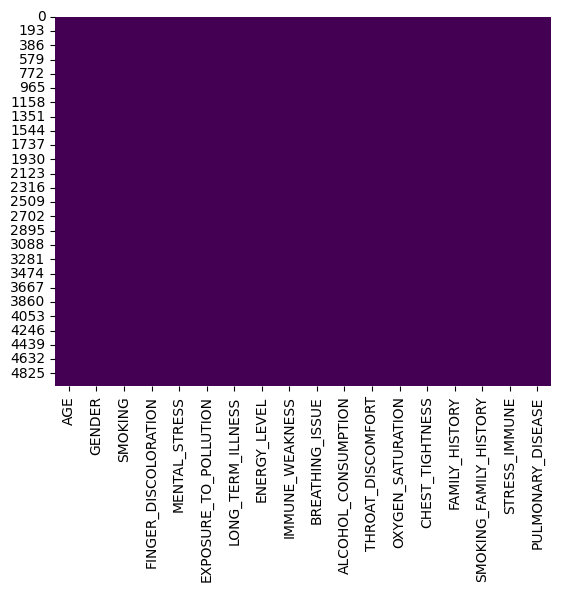

In [13]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [14]:
# No null value , incase we have null value we need to handle them by appropiate imputation techniqes.
# Or sometimes dropping certain unnecessary rows.
# Now check for Duplicates
data.duplicated()
data.duplicated().sum()
# Check if any row is duplicated (returns True/False)
has_duplicates = data.duplicated().any()
print("Has duplicates:", has_duplicates)  # Output: False (if all columns are checked)
duplicate_rows = data[data.duplicated(keep=False)]  # `keep=False` marks all duplicates
print("All duplicate rows:\n", duplicate_rows)
# Remove all rows that have duplicates (keep only unique rows)
data_cleaned = data.drop_duplicates(keep=False)
print("DataFrame with no duplicates at all:\n", data_cleaned)


Has duplicates: False
All duplicate rows:
 Empty DataFrame
Columns: [AGE, GENDER, SMOKING, FINGER_DISCOLORATION, MENTAL_STRESS, EXPOSURE_TO_POLLUTION, LONG_TERM_ILLNESS, ENERGY_LEVEL, IMMUNE_WEAKNESS, BREATHING_ISSUE, ALCOHOL_CONSUMPTION, THROAT_DISCOMFORT, OXYGEN_SATURATION, CHEST_TIGHTNESS, FAMILY_HISTORY, SMOKING_FAMILY_HISTORY, STRESS_IMMUNE, PULMONARY_DISEASE]
Index: []
DataFrame with no duplicates at all:
       AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1

In [15]:
# Columns of our dataset:
data_cleaned.columns 

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

In [16]:
Indep=data_cleaned.drop(columns=["PULMONARY_DISEASE"])
Indep

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0


In [17]:
#For feature selection → Look at predictor vs. response correlation
# For multicollinearity → Look at predictor vs. predictor correlation
#🚀 Use both approaches for better model performance!
A=data_cleaned.drop(columns=["PULMONARY_DISEASE"]).corr()
A

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
AGE,1.000000,-0.004262,-0.030163,-0.012559,-0.027137,-0.004834,0.020401,-0.006921,-0.023072,0.000708,-0.001551,0.032412,-0.001354,-0.005792,0.024816,0.009668,-0.027076
GENDER,-0.004262,1.000000,0.010182,-0.020919,-0.014236,-0.024890,0.017220,-0.006845,0.020156,0.006202,-0.015577,-0.031971,-0.006655,0.027683,0.037199,0.037498,-0.000253
SMOKING,-0.030163,0.010182,1.000000,0.005892,0.008839,-0.008753,0.009048,0.018924,0.007399,0.007500,0.013131,-0.002220,0.014124,0.010220,0.013309,0.358182,-0.001446
FINGER_DISCOLORATION,-0.012559,-0.020919,0.005892,1.000000,0.001116,0.009729,-0.021592,-0.003429,0.000193,0.010217,-0.015992,0.017094,0.011930,0.000497,-0.012645,-0.012390,0.005963
MENTAL_STRESS,-0.027137,-0.014236,0.008839,0.001116,1.000000,0.003466,0.027975,0.002126,-0.014420,0.008755,-0.005022,0.003985,0.014609,0.005719,0.012624,0.006377,0.475476
EXPOSURE_TO_POLLUTION,-0.004834,-0.024890,-0.008753,0.009729,0.003466,1.000000,-0.016238,-0.011571,0.003616,0.006977,0.005995,0.012767,-0.000082,0.004455,0.003798,-0.005284,-0.006655
LONG_TERM_ILLNESS,0.020401,0.017220,0.009048,-0.021592,0.027975,-0.016238,1.000000,0.020933,0.000840,0.019481,0.000149,-0.015141,0.015301,0.003359,0.007240,0.004016,0.012592
ENERGY_LEVEL,-0.006921,-0.006845,0.018924,-0.003429,0.002126,-0.011571,0.020933,1.000000,-0.006170,-0.000905,0.003187,0.002492,0.008761,-0.005799,0.004743,0.011229,-0.012590
IMMUNE_WEAKNESS,-0.023072,0.020156,0.007399,0.000193,-0.014420,0.003616,0.000840,-0.006170,1.000000,0.019460,0.004970,-0.026960,0.005463,0.000347,0.008242,0.012493,0.637578
BREATHING_ISSUE,0.000708,0.006202,0.007500,0.010217,0.008755,0.006977,0.019481,-0.000905,0.019460,1.000000,0.012023,-0.012205,0.004543,0.010624,-0.004146,0.003219,0.010057


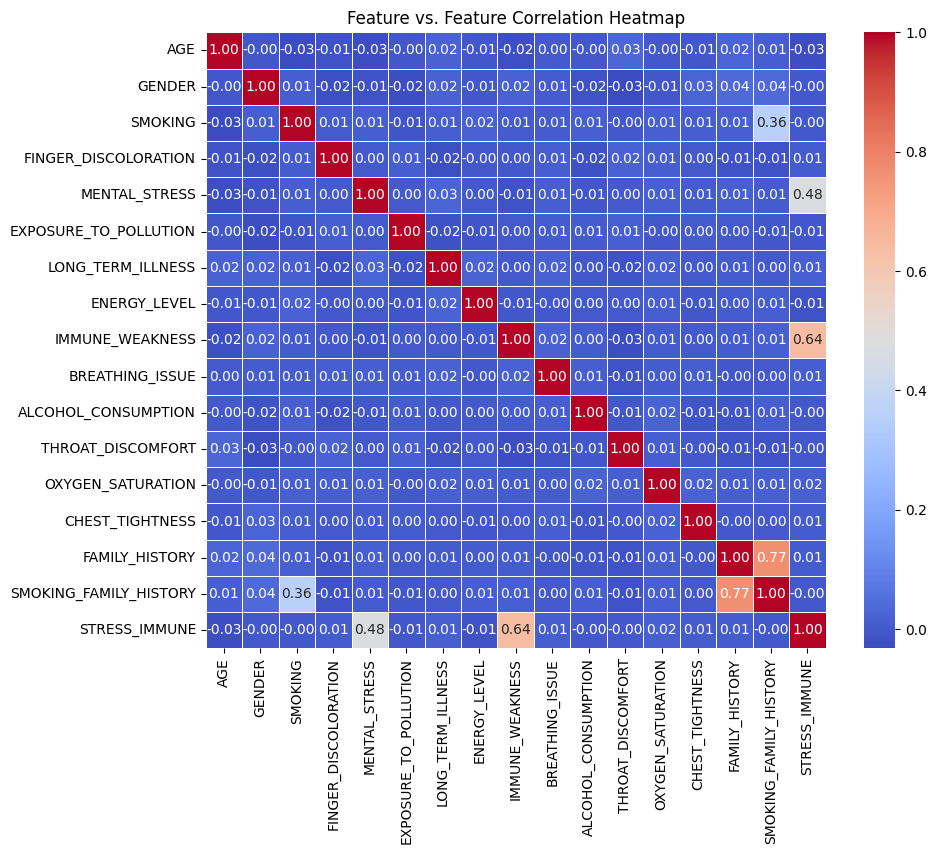

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(A, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature vs. Feature Correlation Heatmap")
plt.show()

In [19]:
# Select the upper triangle of the correlation matrix
C=data_cleaned.drop(columns=["PULMONARY_DISEASE"]).corr().abs()
upper_tri = C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
upper_tri = upper_tri.fillna(0)



# Find all feature pairs with correlation > 0.75
high_corr_pairs = []
threshold = 0.75  # Define correlation threshold

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            high_corr_pairs.append((row, col, upper_tri.loc[row, col]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df)

        Feature 1               Feature 2  Correlation
0  FAMILY_HISTORY  SMOKING_FAMILY_HISTORY     0.769997


In [20]:
B=corr_with_target = data_cleaned.corr()['PULMONARY_DISEASE']
B

AGE                      -0.006489
GENDER                   -0.004025
SMOKING                   0.461467
FINGER_DISCOLORATION      0.026066
MENTAL_STRESS             0.089367
EXPOSURE_TO_POLLUTION     0.095222
LONG_TERM_ILLNESS         0.012589
ENERGY_LEVEL              0.171479
IMMUNE_WEAKNESS           0.124736
BREATHING_ISSUE           0.270464
ALCOHOL_CONSUMPTION       0.000421
THROAT_DISCOMFORT         0.283545
OXYGEN_SATURATION         0.018570
CHEST_TIGHTNESS           0.026244
FAMILY_HISTORY            0.117255
SMOKING_FAMILY_HISTORY    0.302478
STRESS_IMMUNE             0.181053
PULMONARY_DISEASE         1.000000
Name: PULMONARY_DISEASE, dtype: float64

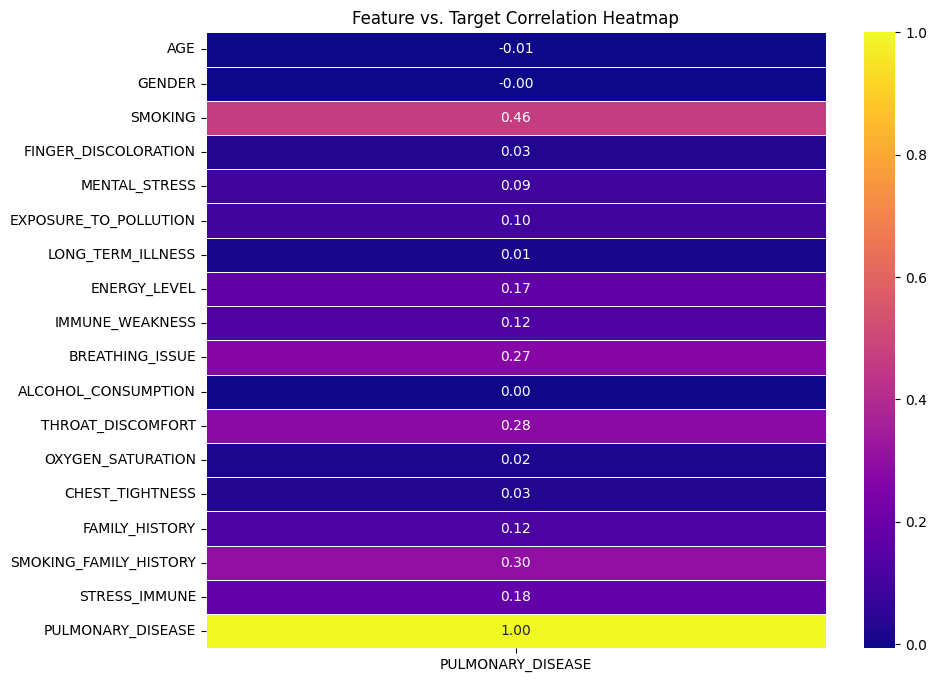

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(B.to_frame(), annot=True, fmt=".2f", cmap="plasma", linewidths=0.5)
plt.title("Feature vs. Target Correlation Heatmap")
plt.show()


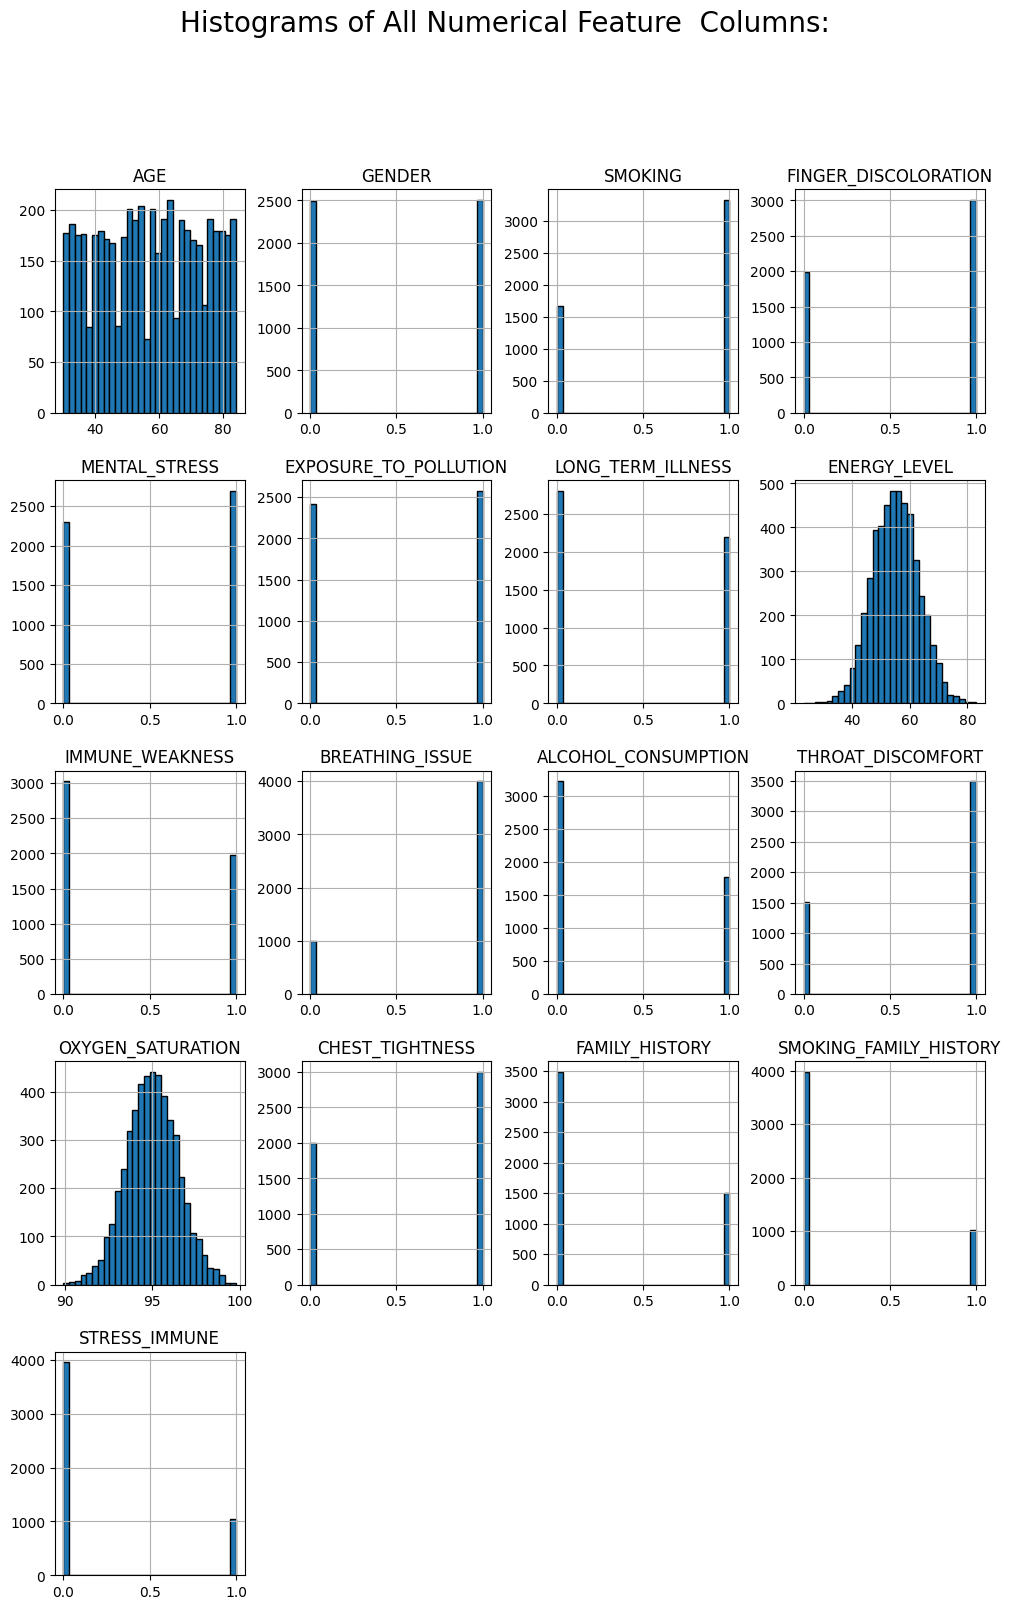

In [22]:
# Plot histogram for each column
data_cleaned.drop(columns=["PULMONARY_DISEASE"]).hist(figsize=(12, 18), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Numerical Feature  Columns:", fontsize=20)
plt.show()

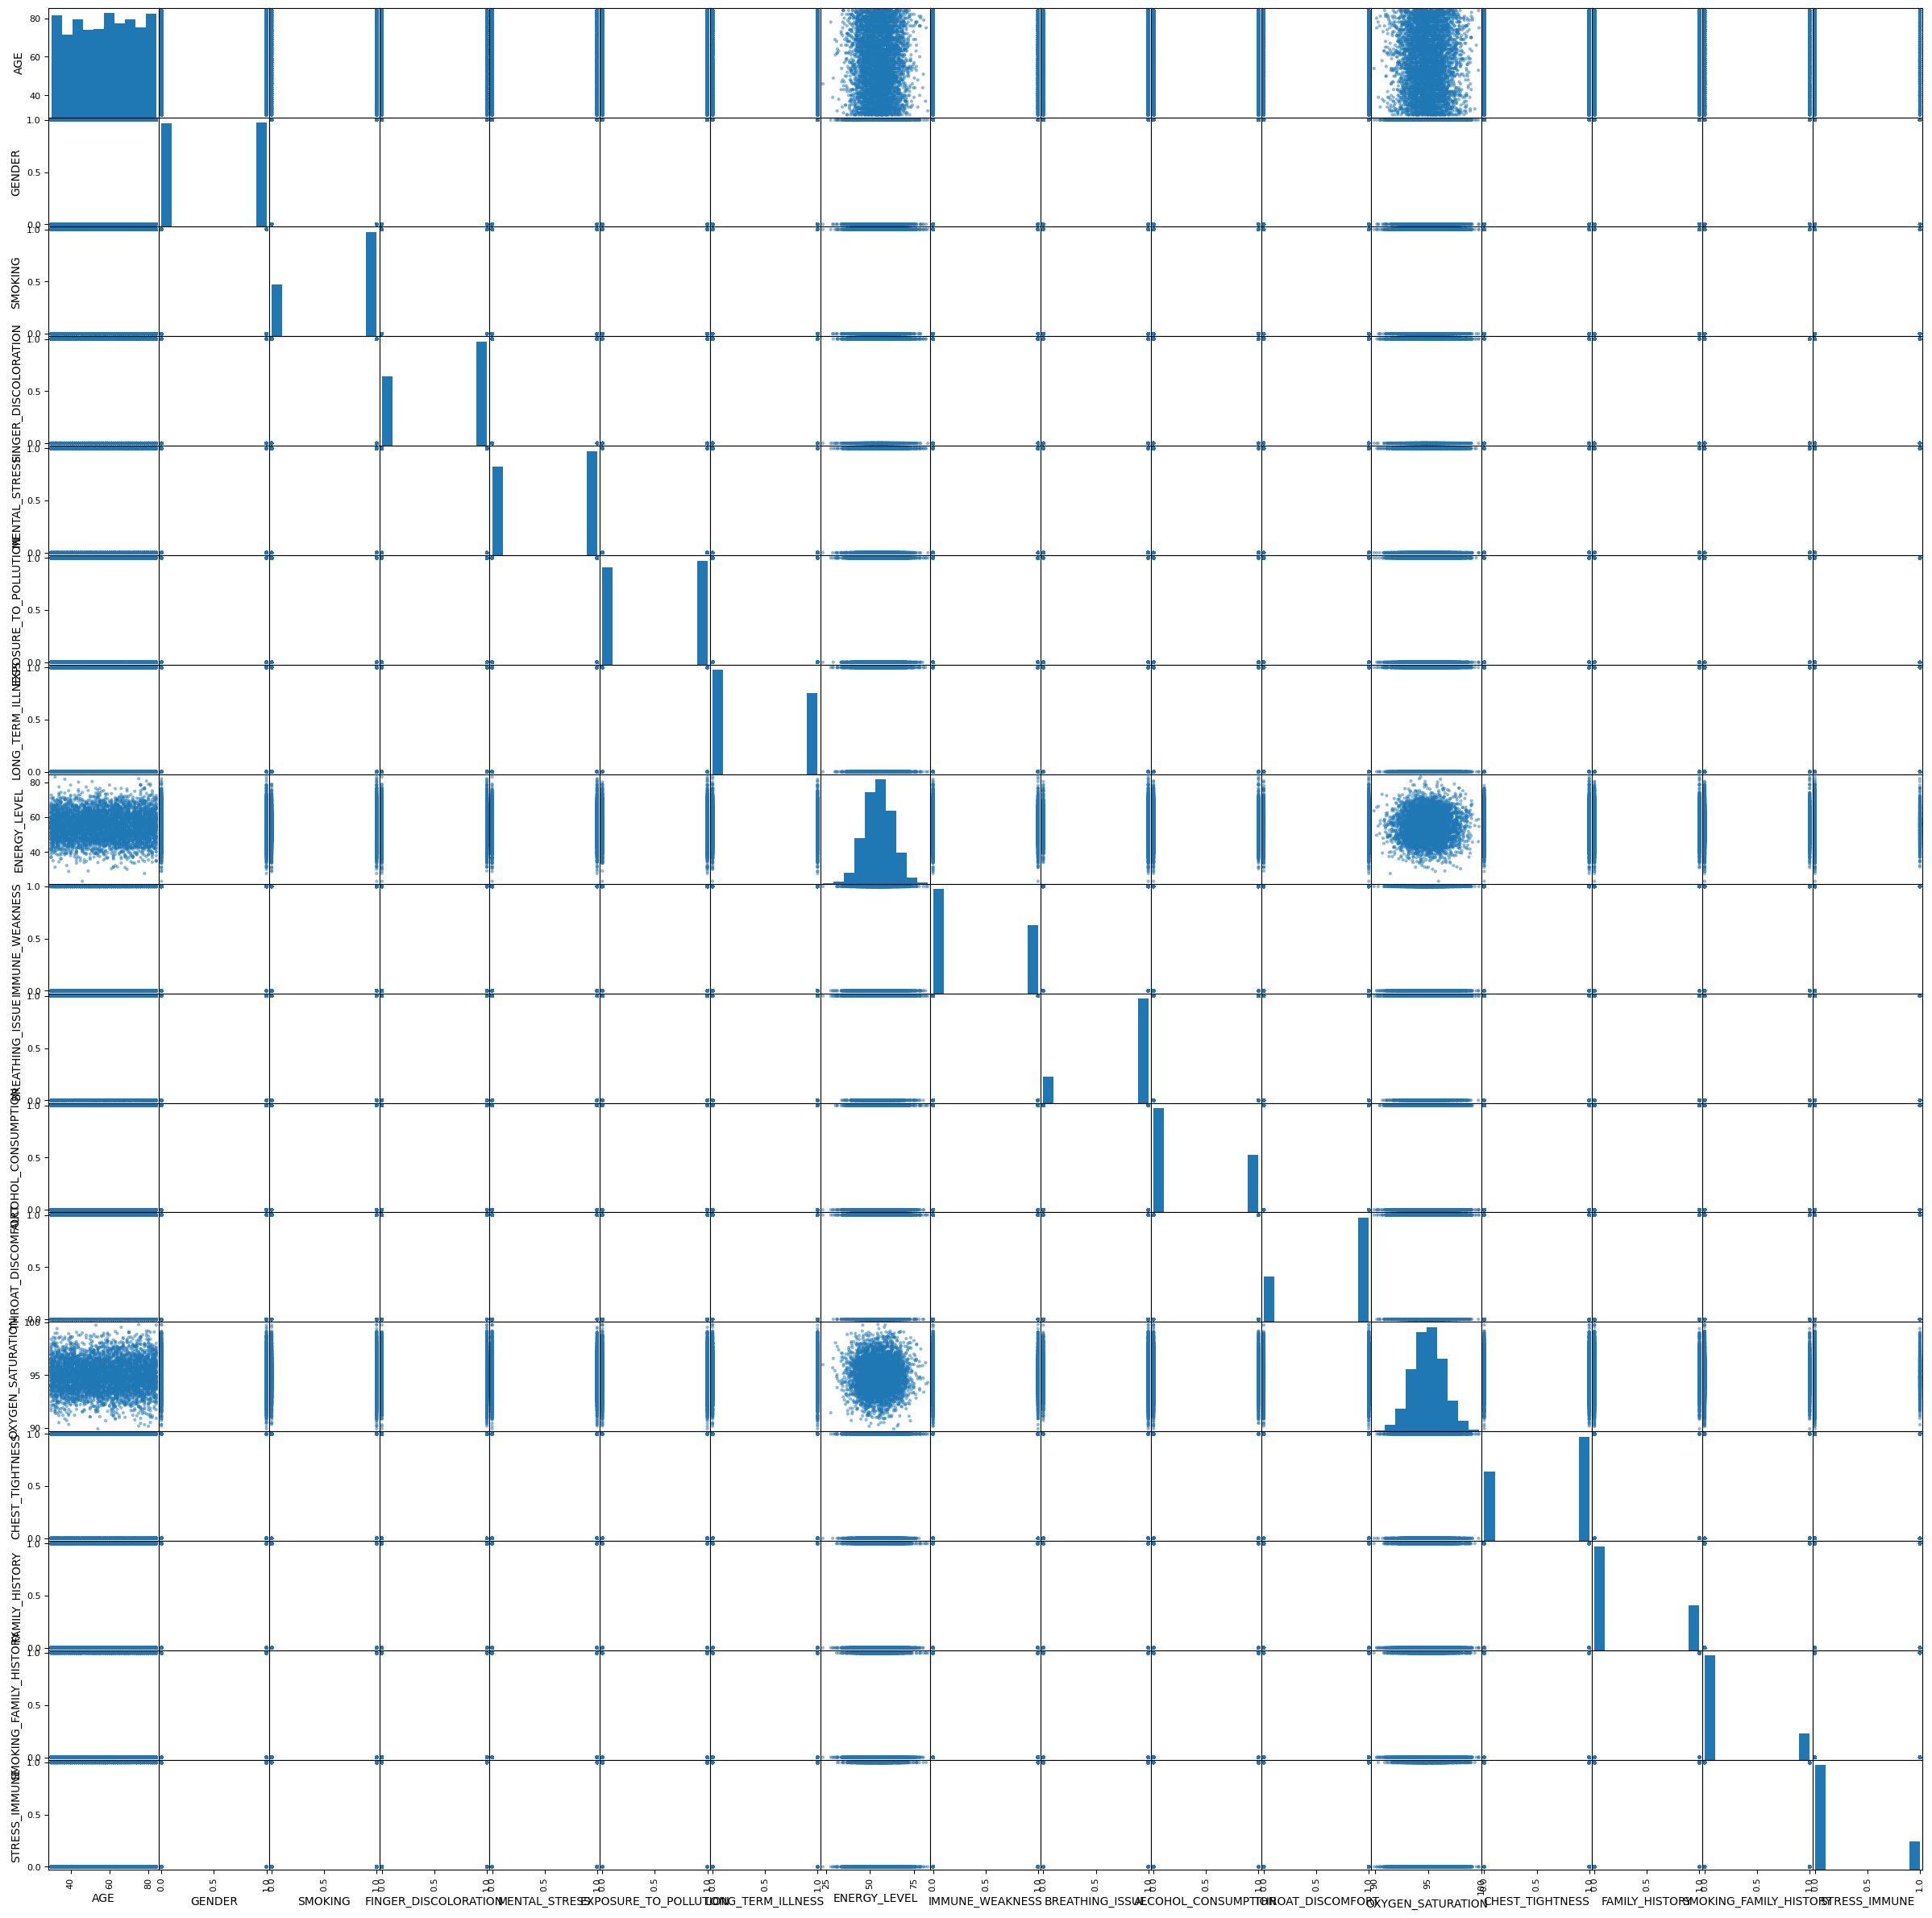

In [23]:
scatter_matrix(data_cleaned.drop(columns=["PULMONARY_DISEASE"]), figsize=(30, 30))
plt.show()

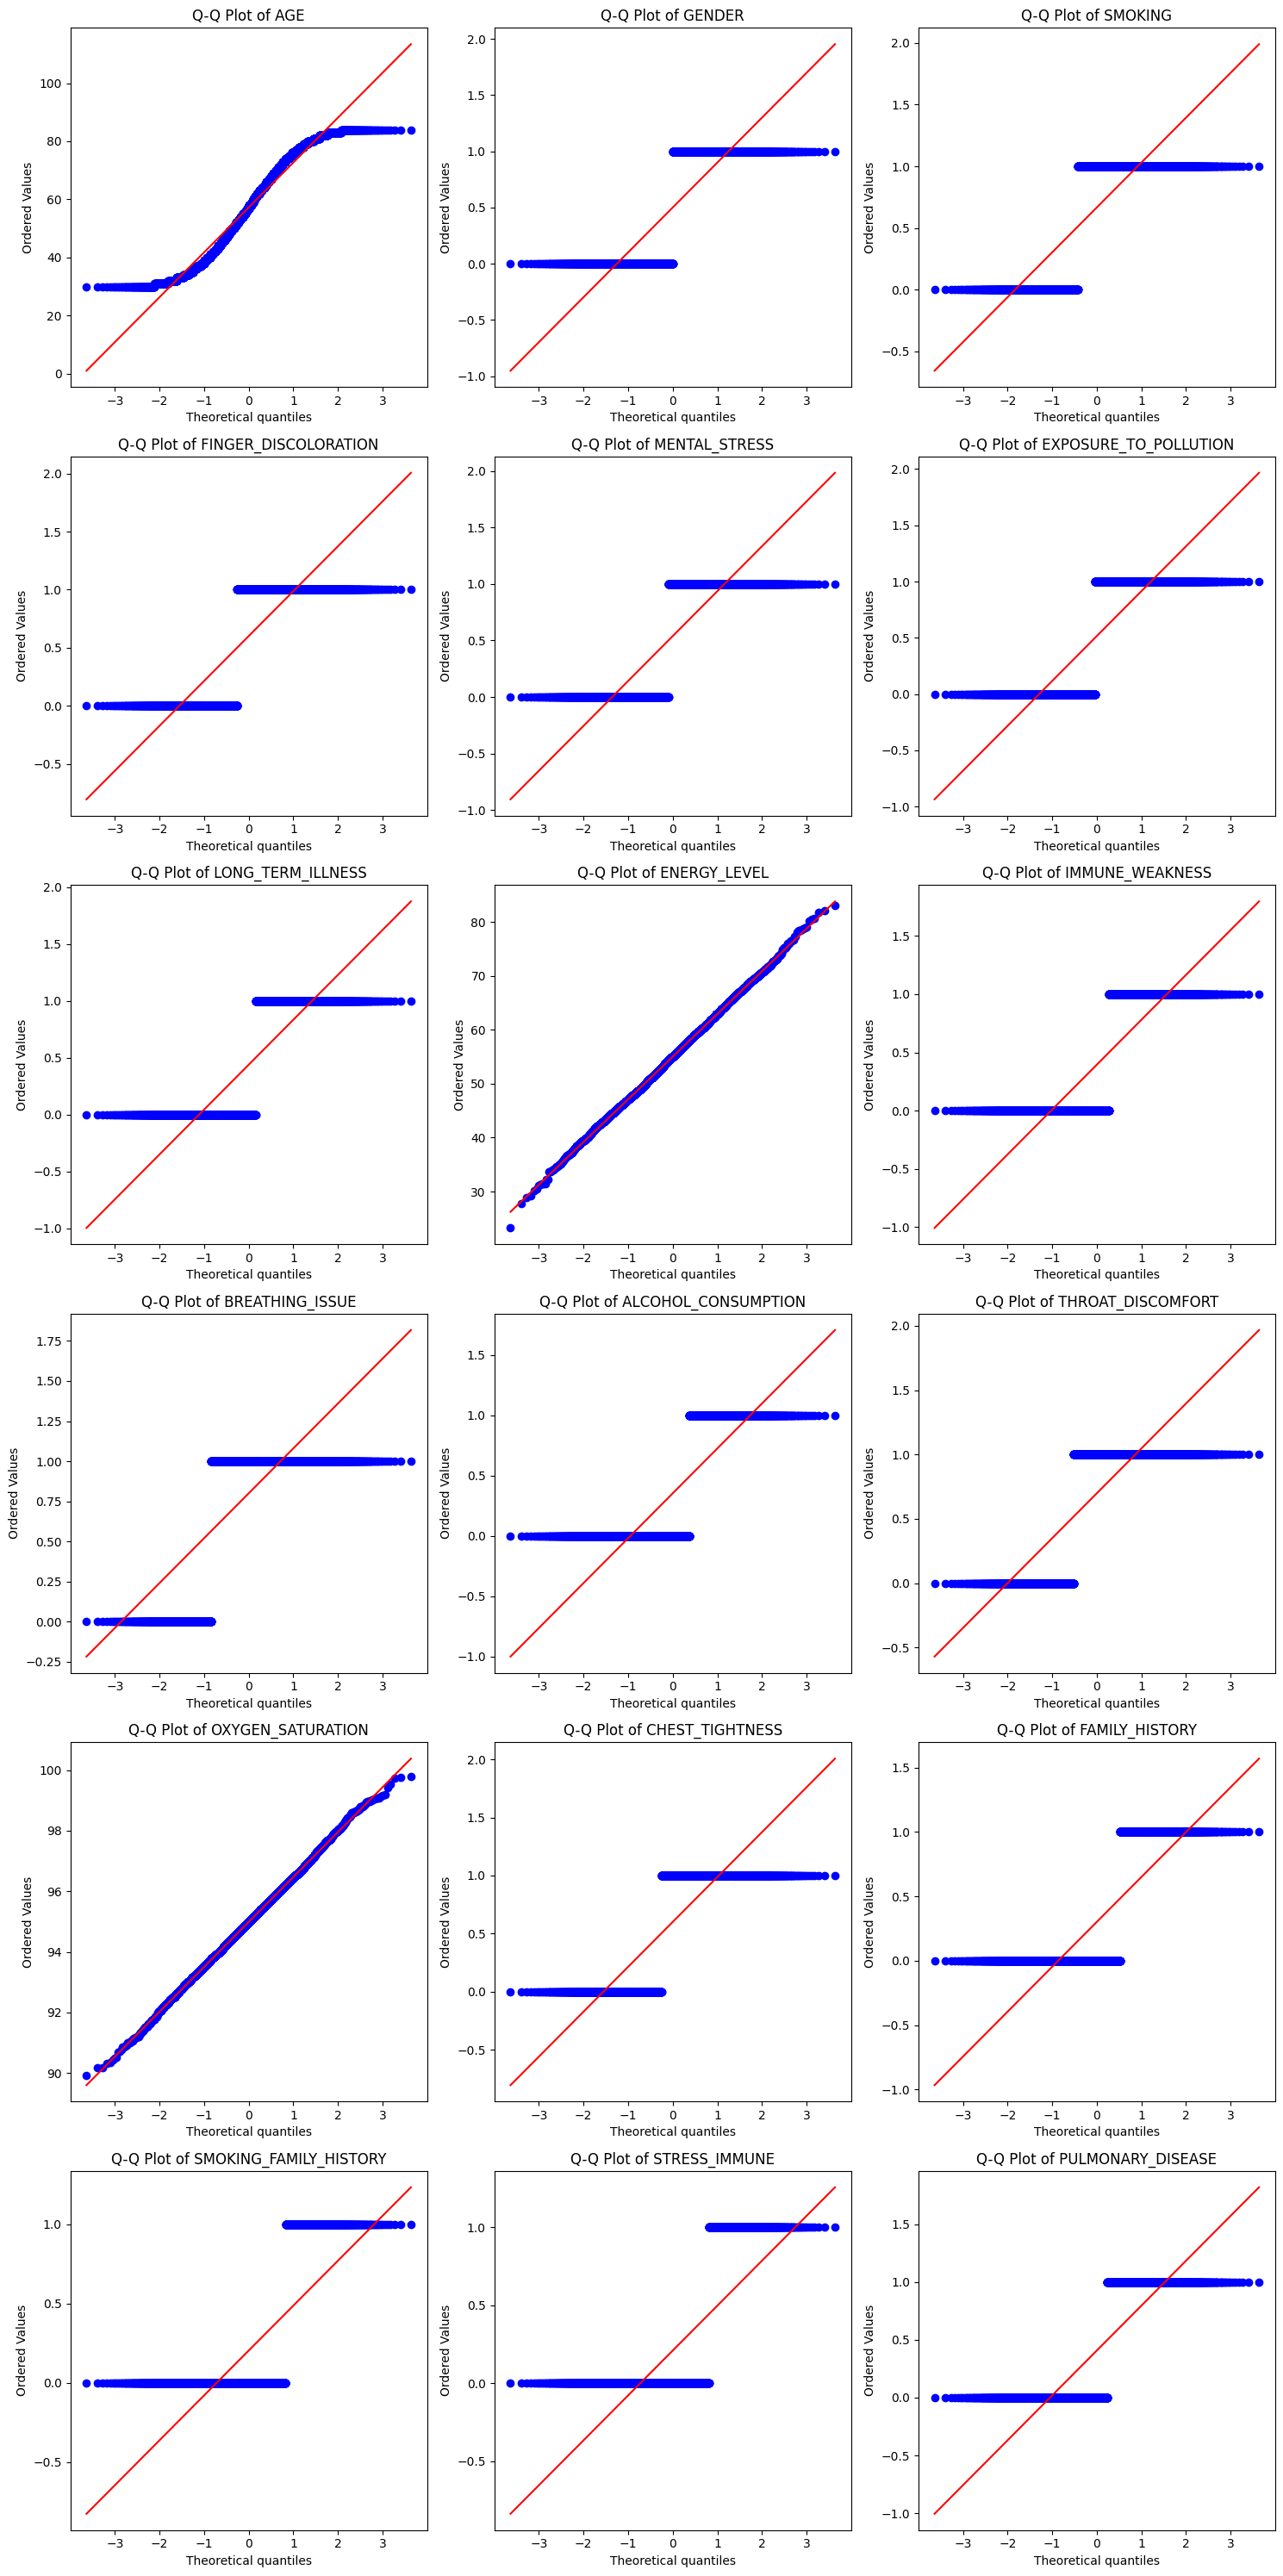

In [24]:
#Q-Q Plot :
# Number of columns
num_cols = len(data_cleaned.columns)

# Create subplots dynamically (3 columns per row)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensures enough rows
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate Q-Q plots for each column
for i, col in enumerate(data_cleaned.columns):
    stats.probplot(data_cleaned[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

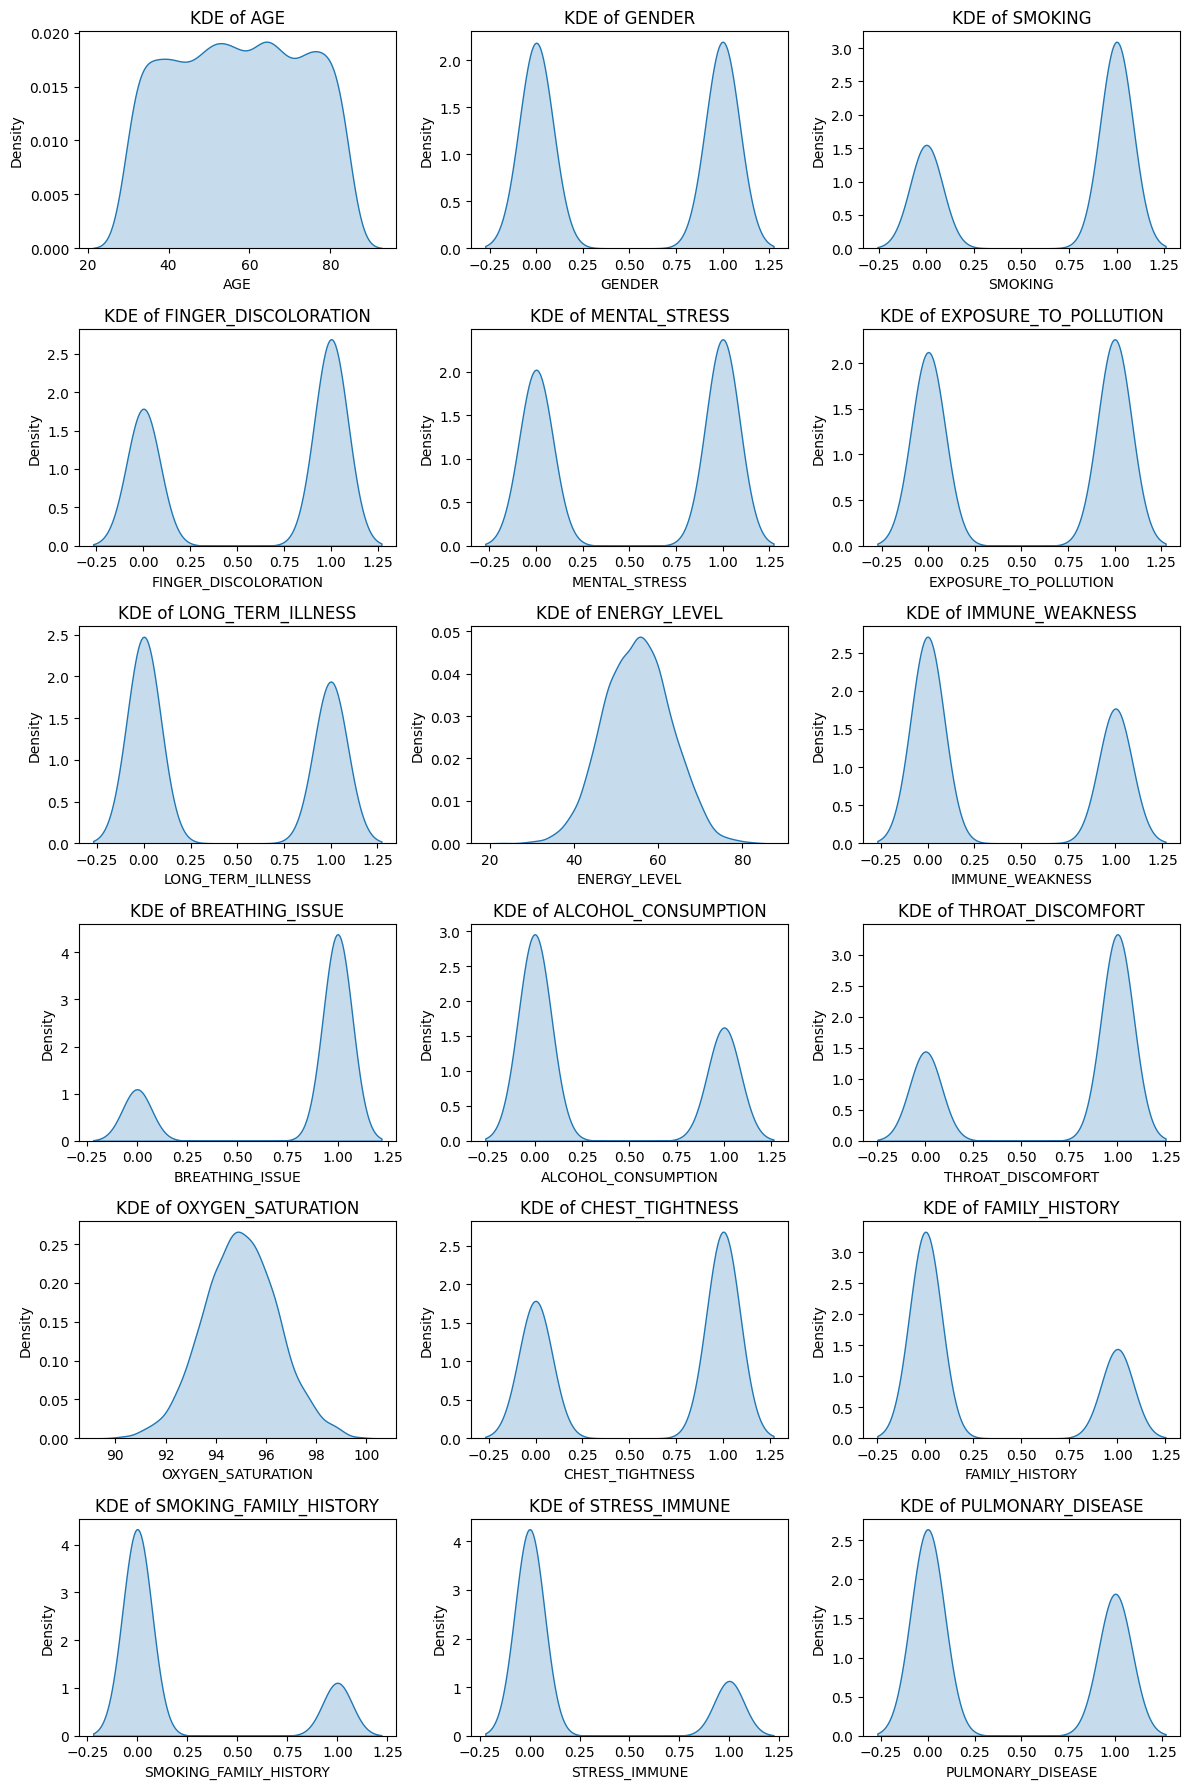

In [25]:
# Set up the grid for subplots
num_cols = data_cleaned.shape[1]  # Total number of numerical columns
cols_per_row = 3  # Number of plots per row
rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, rows * 3))  # Adjust size as needed
axes = axes.flatten()  # Flatten in case of single row

# Plot KDE for each numerical feature
for i, col in enumerate(data_cleaned.columns):
    sns.kdeplot(data_cleaned[col], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE of {col}")
    
# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
#Skewness ≈ 0 → Normal
#Skewness < -0.5 or > 0.5 → Skewed
print(Indep.skew())


AGE                      -0.018267
GENDER                   -0.004801
SMOKING                  -0.706046
FINGER_DISCOLORATION     -0.413479
MENTAL_STRESS            -0.159755
EXPOSURE_TO_POLLUTION    -0.064052
LONG_TERM_ILLNESS         0.245092
ENERGY_LEVEL              0.025655
IMMUNE_WEAKNESS           0.430564
BREATHING_ISSUE          -1.503580
ALCOHOL_CONSUMPTION       0.609880
THROAT_DISCOMFORT        -0.863802
OXYGEN_SATURATION         0.014458
CHEST_TIGHTNESS          -0.410924
FAMILY_HISTORY            0.863802
SMOKING_FAMILY_HISTORY    1.469537
STRESS_IMMUNE             1.427374
dtype: float64


In [27]:
#Kurtosis ≈ 3 → Normal
#Kurtosis > 3 → Heavy-tailed (Leptokurtic)
#Kurtosis < 3 → Light-tailed (Platykurtic)

print(Indep.kurtosis())


AGE                      -1.176472
GENDER                   -2.000777
SMOKING                  -1.502100
FINGER_DISCOLORATION     -1.829767
MENTAL_STRESS            -1.975269
EXPOSURE_TO_POLLUTION    -1.996696
LONG_TERM_ILLNESS        -1.940706
ENERGY_LEVEL             -0.029961
IMMUNE_WEAKNESS          -1.815341
BREATHING_ISSUE           0.260856
ALCOHOL_CONSUMPTION      -1.628698
THROAT_DISCOMFORT        -1.254347
OXYGEN_SATURATION         0.006510
CHEST_TIGHTNESS          -1.831874
FAMILY_HISTORY           -1.254347
SMOKING_FAMILY_HISTORY    0.159602
STRESS_IMMUNE             0.037412
dtype: float64


In [28]:
#p > 0.05 → Data is normally distributed
# p < 0.05 → Data is not normal 
# Shapiro-Wilk Test (Good for small datasets, <5000 samples)
for col in Indep.columns:
    stat, p = shapiro(Indep[col])
    print(f"{col}: p-value = {p}")

# Kolmogorov-Smirnov Test (For large datasets)

#for col in df.columns:
 #   stat, p = kstest(df[col], 'norm')
  #  print(f"{col}: p-value = {p}")

# Anderson-Darling Test

# for col in df.columns:
# result = anderson(df[col])
#  print(f"{col}: Test Statistic = {result.statistic}")

AGE: p-value = 2.053958819928301e-36
GENDER: p-value = 2.1203127046344666e-73
SMOKING: p-value = 1.175614842133481e-75
FINGER_DISCOLORATION: p-value = 3.0516417545995523e-74
MENTAL_STRESS: p-value = 1.5690906654998812e-73
EXPOSURE_TO_POLLUTION: p-value = 2.0200033959357485e-73
LONG_TERM_ILLNESS: p-value = 1.0507116633416471e-73
ENERGY_LEVEL: p-value = 0.4602502640824031
IMMUNE_WEAKNESS: p-value = 2.612572704833724e-74
BREATHING_ISSUE: p-value = 1.3282803419106409e-80
ALCOHOL_CONSUMPTION: p-value = 3.8806966520122937e-75
THROAT_DISCOMFORT: p-value = 1.3867281181651882e-76
OXYGEN_SATURATION: p-value = 0.3485019562497307
CHEST_TIGHTNESS: p-value = 3.1219986301900124e-74
FAMILY_HISTORY: p-value = 1.3867281181652674e-76
SMOKING_FAMILY_HISTORY: p-value = 2.1345532441827824e-80
STRESS_IMMUNE: p-value = 3.864344427478164e-80


In [29]:
# Create dictionary mapping column names to their positions
col_positions = {col: idx for idx, col in enumerate(data_cleaned.columns)}
print(col_positions)

# Define X (features) and y (target)
x = data_cleaned.iloc[:, :-1].values  # Convert to NumPy array
y = data_cleaned.iloc[:, -1].values   # Convert to NumPy array

print(x)
print(y)

# Split data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42)  # Stratify preserves class balance

# Convert back to DataFrame (important for indexing)
x_train_df = pd.DataFrame(x_train, columns=data_cleaned.columns[:-1])  
x_test_df = pd.DataFrame(x_test, columns=data_cleaned.columns[:-1])



{'AGE': 0, 'GENDER': 1, 'SMOKING': 2, 'FINGER_DISCOLORATION': 3, 'MENTAL_STRESS': 4, 'EXPOSURE_TO_POLLUTION': 5, 'LONG_TERM_ILLNESS': 6, 'ENERGY_LEVEL': 7, 'IMMUNE_WEAKNESS': 8, 'BREATHING_ISSUE': 9, 'ALCOHOL_CONSUMPTION': 10, 'THROAT_DISCOMFORT': 11, 'OXYGEN_SATURATION': 12, 'CHEST_TIGHTNESS': 13, 'FAMILY_HISTORY': 14, 'SMOKING_FAMILY_HISTORY': 15, 'STRESS_IMMUNE': 16, 'PULMONARY_DISEASE': 17}
[[68.  1.  1. ...  0.  0.  0.]
 [81.  1.  1. ...  0.  0.  0.]
 [58.  1.  1. ...  0.  0.  0.]
 ...
 [51.  1.  0. ...  0.  0.  1.]
 [76.  1.  0. ...  0.  0.  0.]
 [33.  0.  1. ...  0.  0.  0.]]
[0 1 0 ... 0 0 0]


In [30]:
#Verify split  #✅ Convert y_train and y_test to Pandas Series to use value_counts()
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))
#Why Stratification Matters
#Model Training: Ensures the model sees enough minority class samples during training.
#Evaluation: Test set reflects real-world class ratios, so metrics (e.g., precision, recall) are reliable.
# For extreme imbalance like 95-5% or less :
#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=5)


Training set class distribution:
0    0.592571
1    0.407429
Name: proportion, dtype: float64

Test set class distribution:
0    0.592667
1    0.407333
Name: proportion, dtype: float64


In [31]:
#Fix: Always split before preprocessing!
# Create copies for different scaling methods
x_train_df1 = x_train_df.copy()
x_test_df1 = x_test_df.copy()
    # Define column groups
gaussian_cols = [7,12]  # Indices of Gaussian-distributed continuous features
non_gaussian_cols = [0]# Indices of Non-Gaussian continuous features
robust_scale_cols =[7,12] # Indices of Gaussian with heavy Outliers features
non_gaussian_cols1= [0,7,12] # Assuming all non Gaussian
# WHICH SCALING SHOULD WE DO ?
# CASE 1
# Standardize Gaussian features
scaler_gaussian = StandardScaler()
x_train_df1.iloc[:, gaussian_cols] = scaler_gaussian.fit_transform(x_train_df1.iloc[:, gaussian_cols])
x_test_df1.iloc[:, gaussian_cols] = scaler_gaussian.transform(x_test_df1.iloc[:, gaussian_cols])
# MinMax Scale Non-Gaussian features
scaler_non_gaussian = MinMaxScaler()
x_train_df1.iloc[:, non_gaussian_cols] = scaler_non_gaussian.fit_transform(x_train_df1.iloc[:, non_gaussian_cols])
x_test_df1.iloc[:, non_gaussian_cols] = scaler_non_gaussian.transform(x_test_df1.iloc[:, non_gaussian_cols])

# CASE 2
x_train_df2 = x_train_df.copy()
x_test_df2 = x_test_df.copy()
# Standardize Robust features
robust_scaler = RobustScaler()
x_train_df2.iloc[:, robust_scale_cols] = robust_scaler.fit_transform(x_train_df2.iloc[:, robust_scale_cols])
x_test_df2.iloc[:, robust_scale_cols] = robust_scaler.transform(x_test_df2.iloc[:, robust_scale_cols])
# MinMax Scale Non-Gaussian features
scaler_non_gaussian = MinMaxScaler()
x_train_df2.iloc[:, non_gaussian_cols] = scaler_non_gaussian.fit_transform(x_train_df2.iloc[:, non_gaussian_cols])
x_test_df2.iloc[:, non_gaussian_cols] = scaler_non_gaussian.transform(x_test_df2.iloc[:, non_gaussian_cols])


# CASE 3
# MinMax Scale Non-Gaussian features
x_train_df3 = x_train_df.copy()
x_test_df3 = x_test_df.copy()

scaler_non_gaussian1 = MinMaxScaler()
x_train_df3.iloc[:, non_gaussian_cols1] = scaler_non_gaussian1.fit_transform(x_train_df3.iloc[:, non_gaussian_cols1])
x_test_df3.iloc[:, non_gaussian_cols1] = scaler_non_gaussian1.transform(x_test_df3.iloc[:, non_gaussian_cols1])


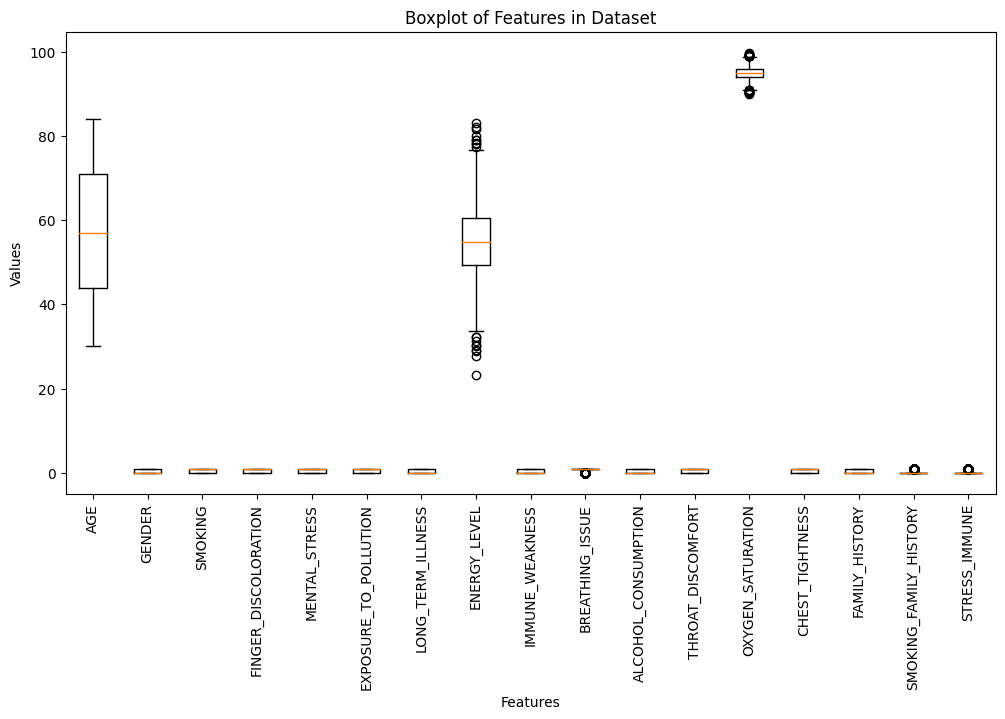

In [32]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.boxplot(x_train_df.values, labels=x_train_df.columns, vert=True)  # Boxplot for all features
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title("Boxplot of Features in Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

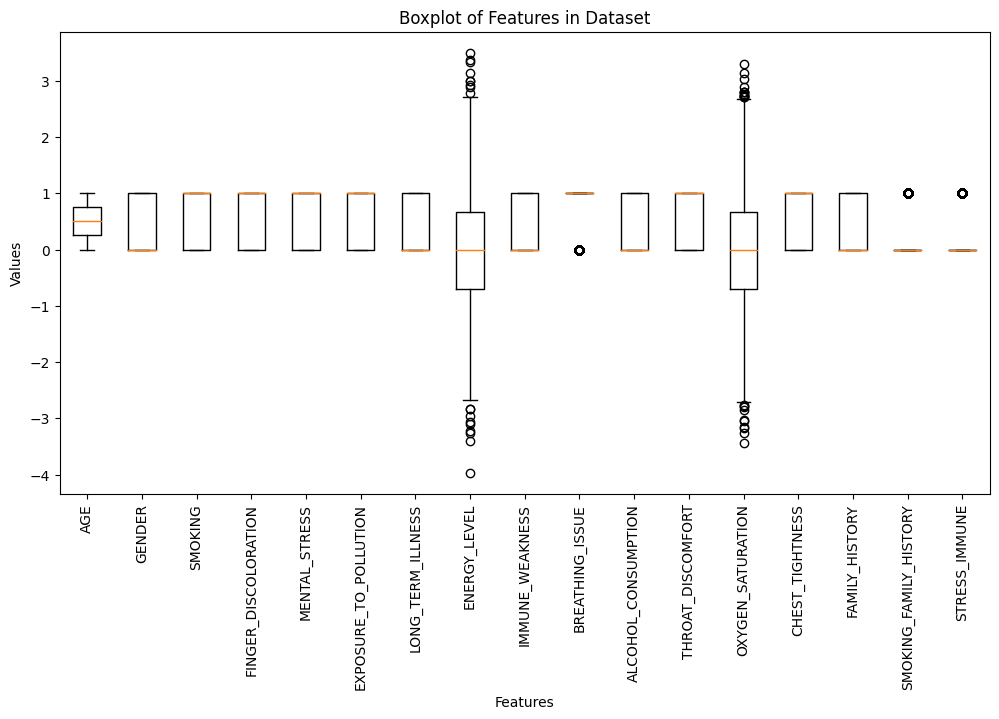

In [33]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.boxplot(x_train_df1.values, labels=x_train_df1.columns, vert=True)  # Boxplot for all features
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title("Boxplot of Features in Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

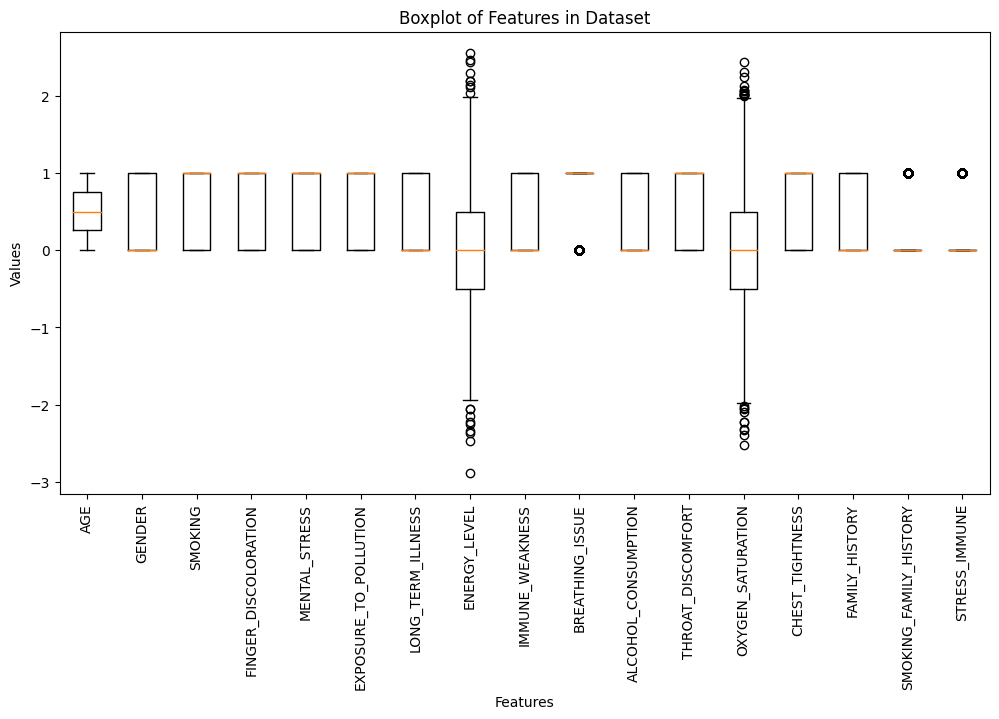

In [34]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.boxplot(x_train_df2.values, labels=x_train_df2.columns, vert=True)  # Boxplot for all features
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title("Boxplot of Features in Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

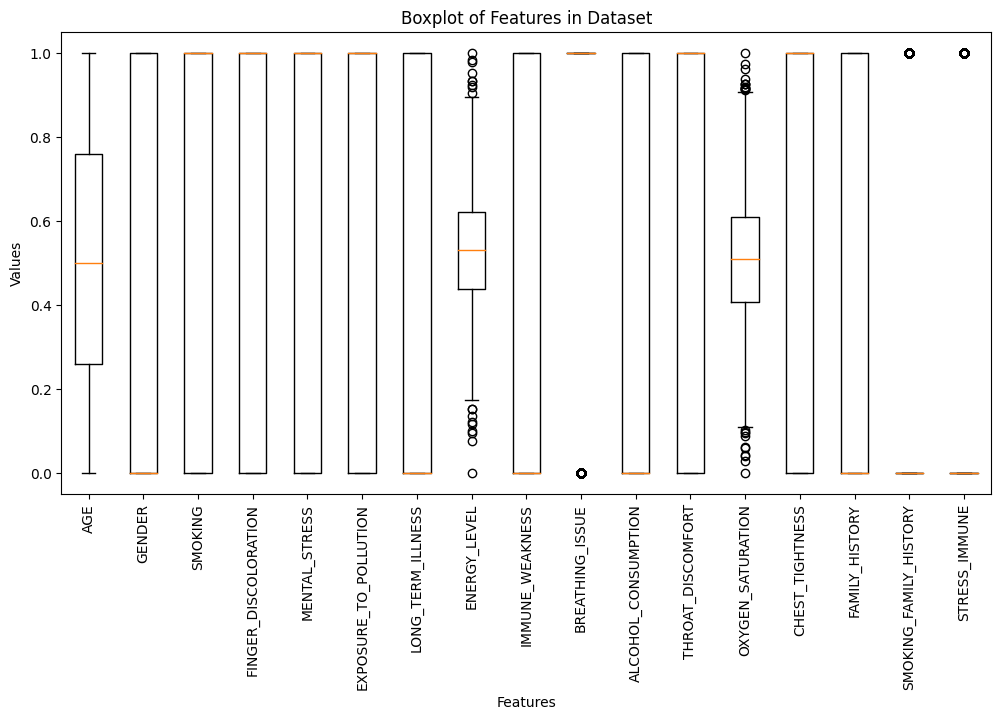

In [35]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.boxplot(x_train_df3.values, labels=x_train_df3.columns, vert=True)  # Boxplot for all features
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title("Boxplot of Features in Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

We only worked with case 1 as its the most appropiate in this case.


In [36]:
# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Load your dataset (assuming 'data_cleaned' exists and target variable is removed)
X_0 = x_train_df # Independent variables

# Iteratively remove features with high VIF
threshold = 10  # VIF threshold
step = 1  # Step counter
dropped_features = [] 
while True:
    print(f"\nStep {step}: Calculating VIF...\n")
    vif_data = calculate_vif(X_0)
    print(vif_data)  # Print current VIF values
    
    max_vif = vif_data["VIF"].max()  # Find the max VIF value
    
    if max_vif < threshold:  # Stop when all VIFs are below threshold
        print("\nAll remaining features have VIF ≤ 10. Stopping iteration.\n")
        break
    
    # Find the feature with the highest VIF and drop it
    feature_to_drop = vif_data.loc[vif_data["VIF"] == max_vif, "Feature"].values[0]
    print(f"\nDropping '{feature_to_drop}' with VIF: {max_vif}\n")
    
    X_0 =X_0.drop(columns=[feature_to_drop])  # Drop the feature
    step += 1  # Increment step counter
    dropped_features.append(feature_to_drop)  # Store the dropped feature

# Now drop the same features from x_test
x_test_vif = x_test_df.drop(columns=dropped_features)

# Final VIF Data
print("\nFinal VIF Data:")
print(calculate_vif(X_0))
x_train_vif=X_0
print(X_0.columns)
print(x_test_vif.columns)


Step 1: Calculating VIF...

                   Feature        VIF
0                      AGE  14.315481
1                   GENDER   2.000457
2                  SMOKING   4.285793
3     FINGER_DISCOLORATION   2.519714
4            MENTAL_STRESS   3.679460
5    EXPOSURE_TO_POLLUTION   2.117468
6        LONG_TERM_ILLNESS   1.788105
7             ENERGY_LEVEL  47.852352
8          IMMUNE_WEAKNESS   3.668080
9          BREATHING_ISSUE   5.000296
10     ALCOHOL_CONSUMPTION   1.566112
11       THROAT_DISCOMFORT   3.389690
12       OXYGEN_SATURATION  80.390618
13         CHEST_TIGHTNESS   2.492612
14          FAMILY_HISTORY   4.420489
15  SMOKING_FAMILY_HISTORY   4.460968
16           STRESS_IMMUNE   3.621725

Dropping 'OXYGEN_SATURATION' with VIF: 80.39061765931686


Step 2: Calculating VIF...

                   Feature        VIF
0                      AGE  11.723225
1                   GENDER   1.979068
2                  SMOKING   4.141227
3     FINGER_DISCOLORATION   2.457261
4        

In [37]:
# Convert to DataFrame
x_train_vif_df = pd.DataFrame(x_train_vif)

If the p-value in the Box-Tidwell test is less than 0.05, it means that the feature violates the linearity assumption of logistic regression.

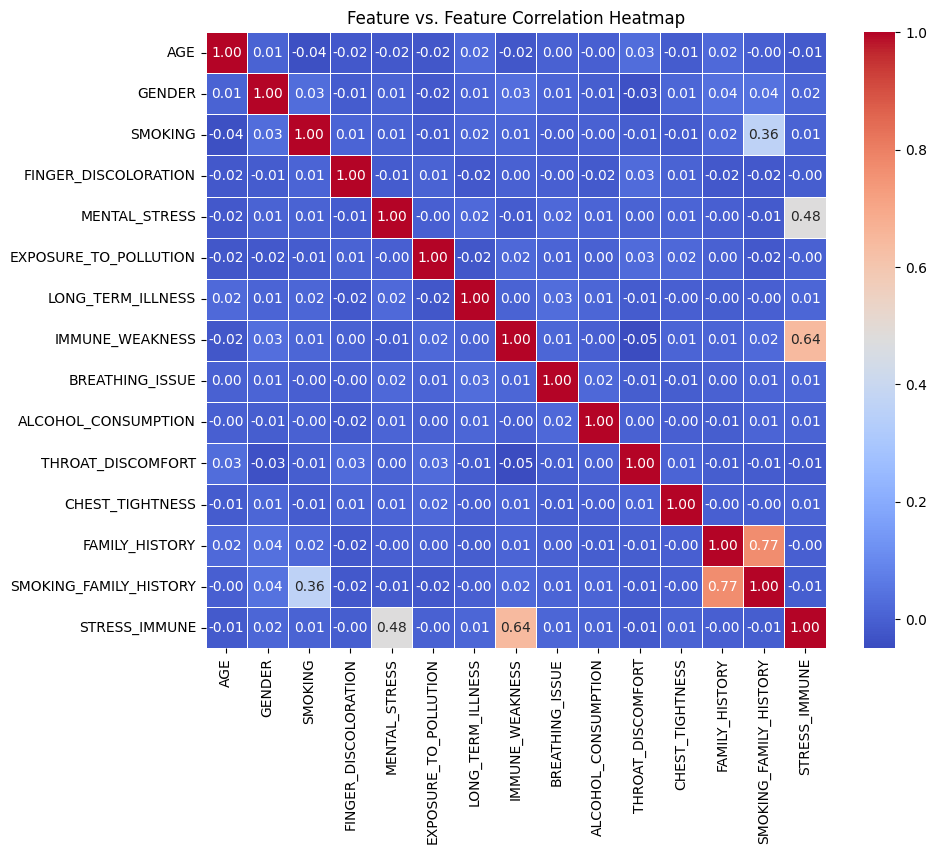

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(x_train_vif_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature vs. Feature Correlation Heatmap")
plt.show()

In [39]:
# After dropping high correlated factors, we need to check if it impacts performance of the model
x_train_vif_1=  x_train_vif.drop('FAMILY_HISTORY', axis=1).reset_index(drop=True)
x_train_vif_2=  x_train_vif.drop('SMOKING_FAMILY_HISTORY', axis=1).reset_index(drop=True)
x_train_vif_3=  x_train_vif.drop(['FAMILY_HISTORY','SMOKING_FAMILY_HISTORY'], axis=1).reset_index(drop=True)
x_train_vif_4=  x_train_vif.drop('IMMUNE_WEAKNESS', axis=1).reset_index(drop=True)
x_train_vif_5=  x_train_vif.drop('STRESS_IMMUNE', axis=1).reset_index(drop=True)
x_train_vif_6=  x_train_vif.drop(['STRESS_IMMUNE','IMMUNE_WEAKNESS'], axis=1).reset_index(drop=True)
x_train_vif_7=  x_train_vif.drop(['FAMILY_HISTORY','IMMUNE_WEAKNESS'], axis=1).reset_index(drop=True)
x_train_vif_8=  x_train_vif.drop(['STRESS_IMMUNE','SMOKING_FAMILY_HISTORY'], axis=1).reset_index(drop=True)
x_train_vif_9=  x_train_vif.drop(['STRESS_IMMUNE','SMOKING_FAMILY_HISTORY','FAMILY_HISTORY','IMMUNE_WEAKNESS'], axis=1).reset_index(drop=True)


x_test_vif_1=  x_test_vif.drop('FAMILY_HISTORY', axis=1).reset_index(drop=True)
x_test_vif_2=  x_test_vif.drop('SMOKING_FAMILY_HISTORY', axis=1).reset_index(drop=True)
x_test_vif_3=  x_test_vif.drop(['FAMILY_HISTORY','SMOKING_FAMILY_HISTORY'], axis=1).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True)
x_test_vif_4=  x_test_vif.drop('IMMUNE_WEAKNESS', axis=1).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True)
x_test_vif_5=  x_test_vif.drop('STRESS_IMMUNE', axis=1).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True)
x_test_vif_6=  x_test_vif.drop(['STRESS_IMMUNE','IMMUNE_WEAKNESS'], axis=1).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True)
x_test_vif_7=  x_test_vif.drop(['FAMILY_HISTORY','IMMUNE_WEAKNESS'], axis=1).reset_index(drop=True).reset_index(drop=True).reset_index(drop=True)
x_test_vif_8=  x_test_vif.drop(['STRESS_IMMUNE','SMOKING_FAMILY_HISTORY'], axis=1).reset_index(drop=True).reset_index(drop=True)
x_test_vif_9=  x_test_vif.drop(['STRESS_IMMUNE','SMOKING_FAMILY_HISTORY','FAMILY_HISTORY','IMMUNE_WEAKNESS'], axis=1).reset_index(drop=True)
print(x_train_vif.index) # Before dropping

print(x_train_vif_1.index) 
print(x_train_vif_2.index)  


RangeIndex(start=0, stop=3500, step=1)
RangeIndex(start=0, stop=3500, step=1)
RangeIndex(start=0, stop=3500, step=1)


In [40]:
#📌 If the interaction term (log_X1) is significant (p < 0.05), the linearity assumption is violated.
# Define your datasets and their corresponding target variables
datasets = {
    "D0": (x_train_vif, y_train),
    "D1": (x_train_vif_1, y_train),
    "D2": (x_train_vif_2, y_train),
    "D3": (x_train_vif_3, y_train),
    "D4": (x_train_vif_4, y_train),
    "D5": (x_train_vif_5, y_train),
    "D6": (x_train_vif_6, y_train),
    "D7": (x_train_vif_7, y_train),
    "D8": (x_train_vif_8, y_train),
    "D9": (x_train_vif_9, y_train)
}

# Define the feature to check (modify as needed)
box_tidwell_feature0 = "AGE"  # Change this to any column name


# Function to perform Box-Tidwell test
def box_tidwell_test(X, y, dataset_name, feature):
    X = X.copy()  # Avoid modifying original dataset
    if feature not in X.columns:
        print(f"Feature '{feature}' not found in {dataset_name}, skipping...")
        return

    X[f"log_{feature}"] = np.log(X[feature] + 1) * X[feature]  # Apply transformation
    X = sm.add_constant(X)  # Add intercept

    try:
        logit_model = sm.Logit(y, X).fit()  # Fit logistic regression
        print(f"\n### Box-Tidwell Test Results for {dataset_name} ###")
        print(logit_model.summary())  # Print results
    except Exception as e:
        print(f"Error in {dataset_name}: {e}")

# Run for each dataset
for name, (X, y) in datasets.items():
    box_tidwell_test(X, y, name, box_tidwell_feature0)
   

Optimization terminated successfully.
         Current function value: 0.379932
         Iterations 7

### Box-Tidwell Test Results for D0 ###
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           16
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.4379
Time:                        19:50:49   Log-Likelihood:                -1329.8
converged:                       True   LL-Null:                       -2365.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.2576      1.30

Box-Tidwell test passes for all cases so no need to worry, linearity assumption remains intact.

In [41]:
#For Standardised Data
# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Load your dataset (assuming 'data_cleaned' exists and target variable is removed)
X_1 = x_train_df1 # Independent variables

# Iteratively remove features with high VIF
threshold = 10  # VIF threshold
step = 1  # Step counter
dropped_features = [] 
while True:
    print(f"\nStep {step}: Calculating VIF...\n")
    vif_data = calculate_vif(X_1)
    print(vif_data)  # Print current VIF values
    
    max_vif = vif_data["VIF"].max()  # Find the max VIF value
    
    if max_vif < threshold:  # Stop when all VIFs are below threshold
        print("\nAll remaining features have VIF ≤ 10. Stopping iteration.\n")
        break

    
    # Find the feature with the highest VIF and drop it
    feature_to_drop = vif_data.loc[vif_data["VIF"] == max_vif, "Feature"].values[0]
    print(f"\nDropping '{feature_to_drop}' with VIF: {max_vif}\n")
    
    X_1 =X_1.drop(columns=[feature_to_drop])  # Drop the feature
    step += 1  # Increment step counter
    dropped_features.append(feature_to_drop)  # Store the dropped feature

# Now drop the same features from x_test
x_test_vif1 = x_test_df1.drop(columns=dropped_features)

# Final VIF Data
print("\nFinal VIF Data:")
print(calculate_vif(X_1))
x_train_vif1=X_1
print(X_0.columns)
print(x_test_vif1.columns)


Step 1: Calculating VIF...

                   Feature       VIF
0                      AGE  3.467667
1                   GENDER  1.925769
2                  SMOKING  3.747396
3     FINGER_DISCOLORATION  2.349863
4            MENTAL_STRESS  3.365481
5    EXPOSURE_TO_POLLUTION  2.024781
6        LONG_TERM_ILLNESS  1.740070
7             ENERGY_LEVEL  1.002692
8          IMMUNE_WEAKNESS  3.417039
9          BREATHING_ISSUE  4.160690
10     ALCOHOL_CONSUMPTION  1.525871
11       THROAT_DISCOMFORT  3.038097
12       OXYGEN_SATURATION  1.002396
13         CHEST_TIGHTNESS  2.333594
14          FAMILY_HISTORY  4.197049
15  SMOKING_FAMILY_HISTORY  4.305037
16           STRESS_IMMUNE  3.486011

All remaining features have VIF ≤ 10. Stopping iteration.


Final VIF Data:
                   Feature       VIF
0                      AGE  3.467667
1                   GENDER  1.925769
2                  SMOKING  3.747396
3     FINGER_DISCOLORATION  2.349863
4            MENTAL_STRESS  3.365481
5    E

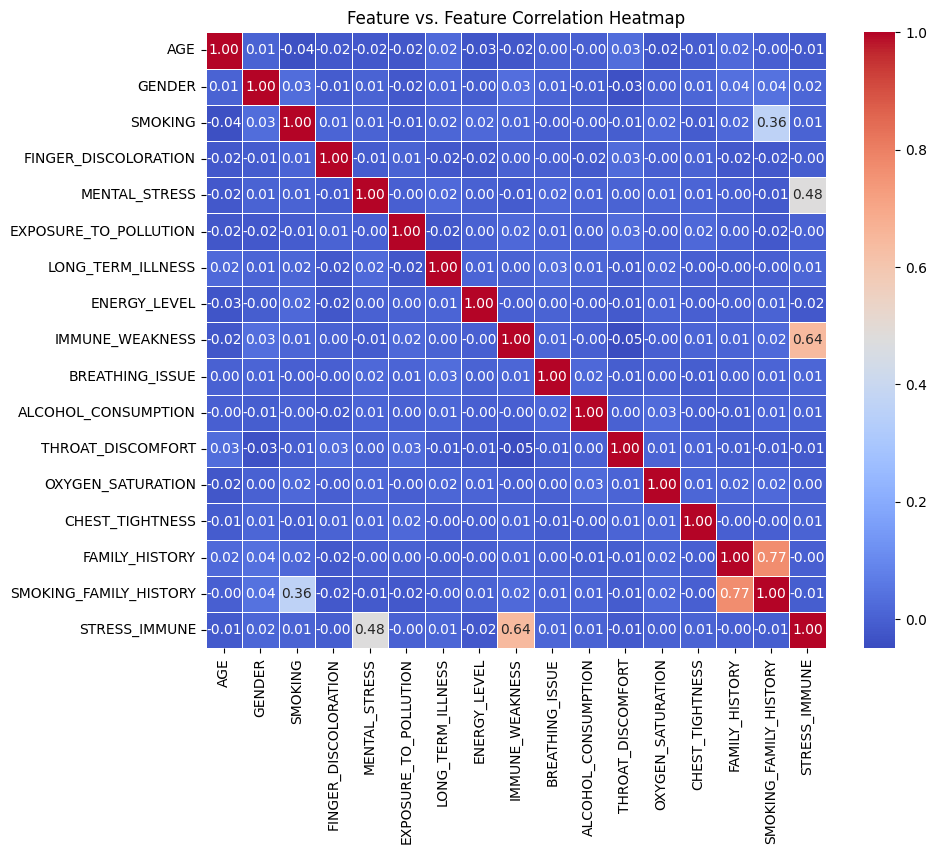

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(x_train_vif1.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature vs. Feature Correlation Heatmap")
plt.show()


🔹 Model: Logistic Without VIF
Accuracy: 0.8826666666666667
Precision: 0.8525121555915721
Recall: 0.8608837970540099
F1-score: 0.8566775244299674
AUC-ROC: 0.9163406538176181
MAE: 0.11733333333333333
MSE: 0.11733333333333333
R2_SCORE: 0.5139723737478805

Confusion Matrix:
[[798  91]
 [ 85 526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       889
           1       0.85      0.86      0.86       611

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500


🔹 Model: Logistic With VIF
Accuracy: 0.8506666666666667
Precision: 0.8018720748829953
Recall: 0.8412438625204582
F1-score: 0.8210862619808307
AUC-ROC: 0.9031157316464737
MAE: 0.14933333333333335
MSE: 0.14933333333333335
R2_SCORE: 0.3814193847700298

Confusion Matrix:
[[762 127]
 [ 97 514]]

Classification Report:
              precision    recall  f1-

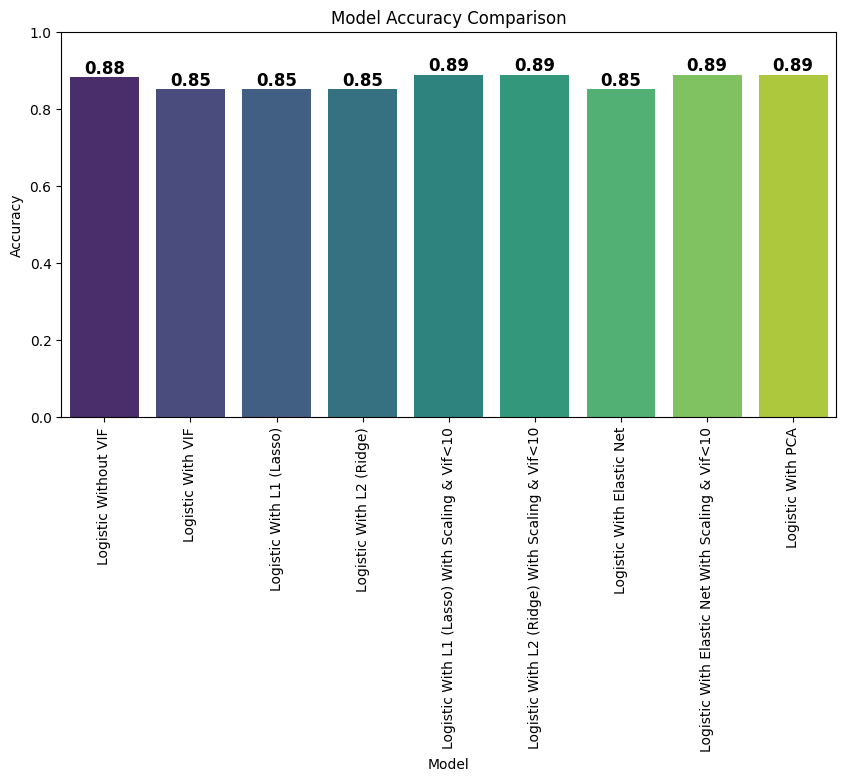

In [43]:
# 📌 Step 3: Function to Train & Evaluate Model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)


    print(f"\n🔹 Model: {model_name}")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("AUC-ROC:", auc)
    print("MAE:", mae)
    print("MSE:", mse)
    print("R2_SCORE:", r2)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {"Model": model_name, "Accuracy": acc, "Precision": precision, "Recall": recall, "F1-Score": f1, "AUC-ROC": auc,"MAE": mae,"MSE": mse,"R2_SCORE": r2}

# 📌 Step 4: Train Models & Compare
# 1️⃣ Logistic Regression Without VIF
logistic_no_vif = LogisticRegression(solver='liblinear')
results_no_vif = train_evaluate_model(logistic_no_vif, x_train, x_test, y_train, y_test, "Logistic Without VIF")

# 2️⃣ Logistic Regression With VIF-filtered Features
logistic_vif = LogisticRegression(solver='liblinear')
results_vif = train_evaluate_model(logistic_vif, x_train_vif, x_test_vif, y_train, y_test, "Logistic With VIF")

# 3️⃣ Logistic Regression With L1 (Lasso)
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
results_l1 = train_evaluate_model(logistic_l1, x_train_vif, x_test_vif, y_train, y_test, "Logistic With L1 (Lasso)")

# 4️⃣ Logistic Regression With L2 (Ridge)
logistic_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
results_l2 = train_evaluate_model(logistic_l2, x_train_vif, x_test_vif, y_train, y_test, "Logistic With L2 (Ridge)")

# 5️⃣ Logistic Regression With Elastic Net (L1 + L2)
logistic_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0,max_iter=5000)
results_elasticnet = train_evaluate_model(logistic_elasticnet, x_train_vif, x_test_vif, y_train, y_test, "Logistic With Elastic Net")
# 3️⃣ Logistic Regression With L1 (Lasso) With Scaling & Vif<10
logistic_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
results_l1_1 = train_evaluate_model(logistic_l1_1, x_train_vif1, x_test_vif1, y_train, y_test, "Logistic With L1 (Lasso) With Scaling & Vif<10")

# 4️⃣ Logistic Regression With L2 (Ridge) With Scaling & Vif<10
logistic_l2_1 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
results_l2_1 = train_evaluate_model(logistic_l2_1, x_train_vif1, x_test_vif1, y_train, y_test, "Logistic With L2 (Ridge) With Scaling & Vif<10")
# 5️⃣ Logistic Regression With Elastic Net (L1 + L2) With Scaling & Vif<10
logistic_elasticnet_1 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0,max_iter=5000)
results_elasticnet_1 = train_evaluate_model(logistic_elasticnet_1, x_train_vif1, x_test_vif1, y_train, y_test, "Logistic With Elastic Net With Scaling & Vif<10")

# 

# 📌 Step 5: PCA on Data Without VIF
# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)  
X_train_pca = x_train_df1
X_test_pca = x_test_df1

# Train Logistic Regression on PCA-transformed data
logistic_pca = LogisticRegression(solver='liblinear')
results_pca = train_evaluate_model(logistic_pca, X_train_pca, X_test_pca, y_train, y_test, "Logistic With PCA")

# 📌 Step 6: Compare Performance
results_df = pd.DataFrame([results_no_vif, results_vif, results_l1, results_l2,results_l1_1,results_l2_1,results_elasticnet,results_elasticnet_1, results_pca])
print("\n📊 Model Comparison:")
print(results_df)

# 📌 Step 7: Visualize Performance
plt.figure(figsize=(10, 5))

# Create bar plot
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

# Annotate bars with accuracy values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.xticks(rotation=90)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Adjust Y-axis to fit values properly
plt.show()


🔹 Model: Logistic With VIF 1
Accuracy: 0.8506666666666667
Precision: 0.8018720748829953
Recall: 0.8412438625204582
F1-score: 0.8210862619808307
AUC-ROC: 0.9023692005766056
MAE: 0.14933333333333335
MSE: 0.14933333333333335
R2_SCORE: 0.3814193847700298

Confusion Matrix:
[[762 127]
 [ 97 514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       889
           1       0.80      0.84      0.82       611

    accuracy                           0.85      1500
   macro avg       0.84      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500


🔹 Model: Logistic With L1 (Lasso) 1
Accuracy: 0.8513333333333334
Precision: 0.803125
Recall: 0.8412438625204582
F1-score: 0.8217426059152678
AUC-ROC: 0.9024824229213575
MAE: 0.14866666666666667
MSE: 0.14866666666666667
R2_SCORE: 0.38418090537373495

Confusion Matrix:
[[763 126]
 [ 97 514]]

Classification Report:
              precision    recall  f1-s

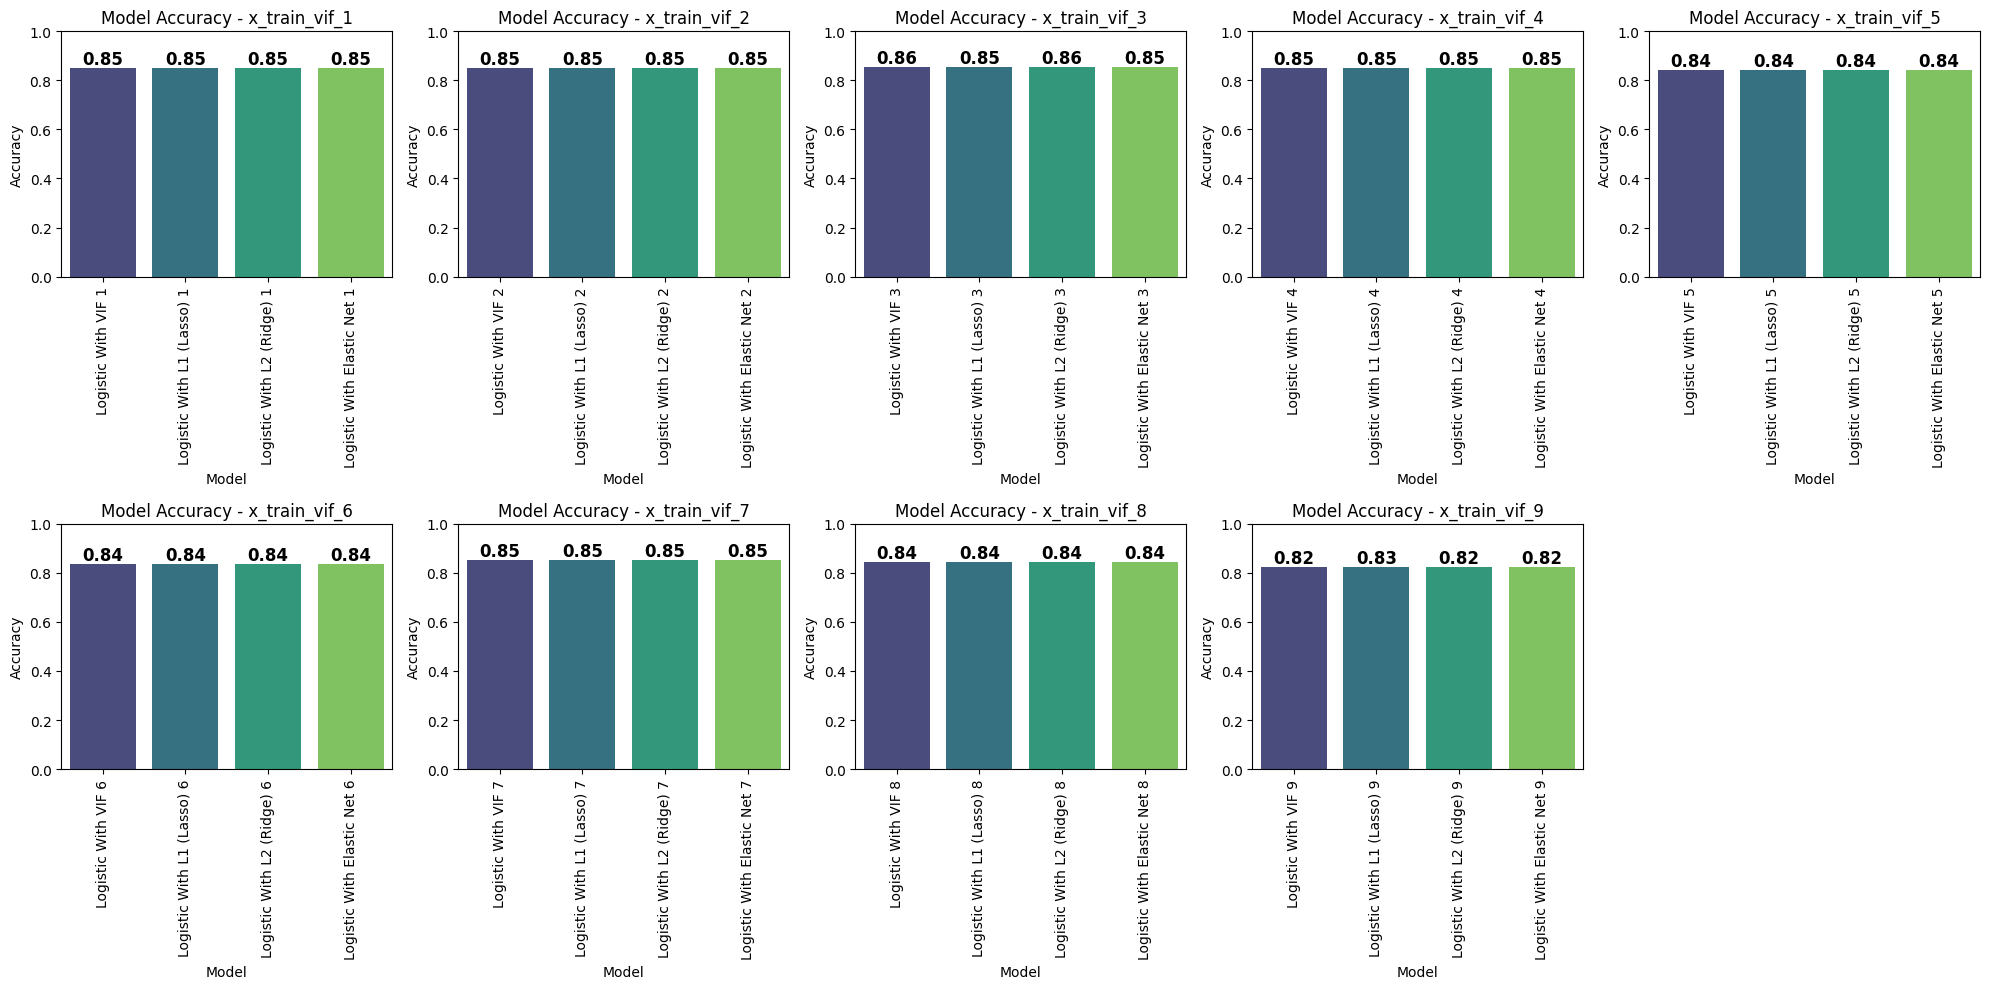


📊 Final Model Comparison Table:
                          Model  Accuracy  Precision    Recall  F1-Score  \
0           Logistic With VIF 1  0.850667   0.801872  0.841244  0.821086   
1    Logistic With L1 (Lasso) 1  0.851333   0.803125  0.841244  0.821743   
2    Logistic With L2 (Ridge) 1  0.850667   0.801872  0.841244  0.821086   
3   Logistic With Elastic Net 1  0.850667   0.801872  0.841244  0.821086   
4           Logistic With VIF 2  0.850667   0.801872  0.841244  0.821086   
5    Logistic With L1 (Lasso) 2  0.852000   0.804382  0.841244  0.822400   
6    Logistic With L2 (Ridge) 2  0.850667   0.801872  0.841244  0.821086   
7   Logistic With Elastic Net 2  0.851333   0.803125  0.841244  0.821743   
8           Logistic With VIF 3  0.855333   0.814696  0.834697  0.824576   
9    Logistic With L1 (Lasso) 3  0.854667   0.814400  0.833061  0.823625   
10   Logistic With L2 (Ridge) 3  0.855333   0.814696  0.834697  0.824576   
11  Logistic With Elastic Net 3  0.854667   0.813397  0

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Define the number of subplots (rows=2, columns=5)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  # Flatten into a list

# Create an empty list to store results for the final table
all_results = []

for i in range(1, 10):  # Loop from _1 to _9
    x_train_var = f"x_train_vif_{i}"
    x_test_var = f"x_test_vif_{i}"
    
    # Train models
    logistic_vif = LogisticRegression(solver='liblinear')
    results_vif = train_evaluate_model(logistic_vif, locals()[x_train_var], locals()[x_test_var], y_train, y_test, f"Logistic With VIF {i}")

    logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
    results_l1 = train_evaluate_model(logistic_l1, locals()[x_train_var], locals()[x_test_var], y_train, y_test, f"Logistic With L1 (Lasso) {i}")

    logistic_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
    results_l2 = train_evaluate_model(logistic_l2, locals()[x_train_var], locals()[x_test_var], y_train, y_test, f"Logistic With L2 (Ridge) {i}")

    logistic_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=5000)
    results_elasticnet = train_evaluate_model(logistic_elasticnet, locals()[x_train_var], locals()[x_test_var], y_train, y_test, f"Logistic With Elastic Net {i}")

    # Store results in a DataFrame
    results_df = pd.DataFrame([results_vif, results_l1, results_l2, results_elasticnet])
    results_df['Iteration'] = i  # Add iteration number
    
    # Append results to the list
    all_results.append(results_df)

    # 📌 Plot in subplot
    ax = axes[i-1]  # Use index (i-1) for correct subplot
    sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', ax=ax)

    # Annotate bars with accuracy values
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Formatting
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Model Accuracy - x_train_vif_{i}")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0, 1)

# 📌 Remove the extra 10th (empty) subplot
fig.delaxes(axes[9])

# Adjust layout
plt.tight_layout()
plt.show()

# 📌 Combine all results into a single table
final_results_df = pd.concat(all_results, ignore_index=True)

# 📌 Display the final results table
print("\n📊 Final Model Comparison Table:")
print(final_results_df)

# 📌 Optionally, save to CSV
final_results_df.to_csv("model_comparison_results.csv", index=False)


In [45]:
#There is no significant change in model performance with dropping the highly correlated factors.

In [46]:
#DECISION TREE:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Decision Tree Accuracy: {accuracy:.3f}")
print(f"Decision Tree Accuracy: {accuracy1:.3f}")

Decision Tree Accuracy: 0.864
Decision Tree Accuracy: 0.865


In [47]:
# RANDOM FOREST: 
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.3f}")

Decision Tree Accuracy: 0.901


In [48]:
#XGBOOST CLASSIFICATION:
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=10)  # Adjust for class imbalance
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"XG BOOST CLASS: {accuracy:.3f}")

XG BOOST CLASS: 0.878


In [49]:
#LGM CLASSIFIER:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"XG BOOST CLASS: {accuracy:.3f}")

[LightGBM] [Info] Number of positive: 1426, number of negative: 2074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407429 -> initscore=-0.374606
[LightGBM] [Info] Start training from score -0.374606
XG BOOST CLASS: 0.895


In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"CAT BOOST CLASS: {accuracy:.3f}")

CAT BOOST CLASS: 0.900


In [51]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', probability=True, class_weight='balanced')

model.fit(x_train_df1, y_train)
y_pred = model.predict(x_test_df1)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC CLASS: {accuracy:.3f}")
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred.round()) 


print(auc)
print(f1)

SVC CLASS: 0.878
0.8783945992021047
0.8546465448768865


In [52]:
print(np.unique(y_pred, return_counts=True))  # Check class distribution


(array([0, 1]), array([852, 648]))


In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train_df1, y_train)
y_pred = model.predict(x_test_df1)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN CLASS: {accuracy:.3f}") 

KNN CLASS: 0.857


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input

# Function to create and compile a Sequential model
def get_seq_dense():
    model = Sequential([
         Input(shape=(x_train.shape[1],)),  # Explicit Input layer
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')   # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model  # Correct indentation

# Create model instance
model = get_seq_dense()  # Call the function to get a fresh compiled model

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Predict
y_pred = model.predict(x_test)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Seq Bin Adam: {accuracy:.4f}")


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4859 - loss: 4.4266
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 0.6497
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.6254
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.6037
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 0.5760
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7117 - loss: 0.5655
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7589 - loss: 0.5255
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7749 - loss: 0.4990
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4703
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4676
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8209 - loss: 0.4426
Epoch 12/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [55]:
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary (0 or 1)

# Print first 10 predictions
print("Predicted Probabilities:", y_pred_prob[:10].flatten())
print("Predicted Labels:", y_pred[:10].flatten())


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Probabilities: [0.20803893 0.06927779 0.4409396  0.94762105 0.84928834 0.02158139
 0.1264135  0.01916538 0.8181076  0.0217882 ]
Predicted Labels: [0 0 0 1 1 0 0 0 1 0]


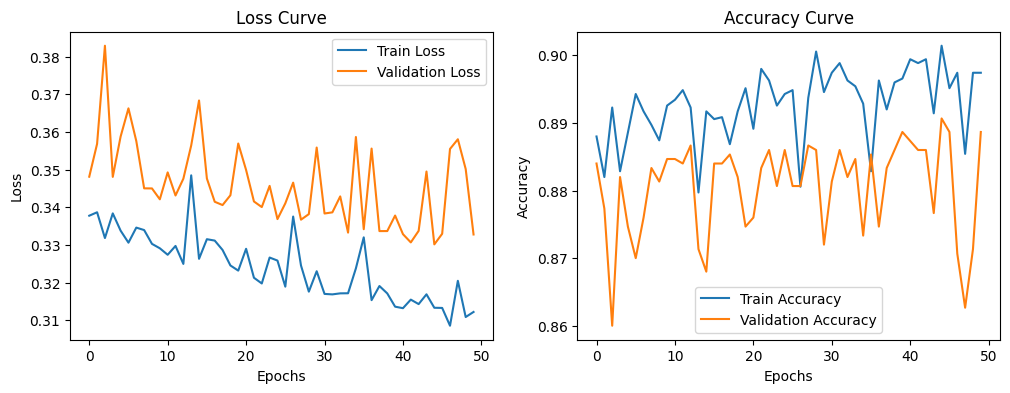

In [56]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0)

plt.figure(figsize=(12, 4))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
from tensorflow.keras.layers import Dropout
# Function to create a Sequential Dropout model
def get_seq_dropout():
    model = Sequential([
        Input(shape=(x_train.shape[1],)),  # ✅ Explicit input layer
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create model instance
model = get_seq_dropout()  # Call the function to get a fresh compiled model

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Predict
y_pred = model.predict(x_test)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Seq Bin Adam: {accuracy:.4f}")

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5160 - loss: 2.4779
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5382 - loss: 0.8176
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5580 - loss: 0.7092
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5809 - loss: 0.6895
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - loss: 0.6821
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5899 - loss: 0.6791
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 0.6796
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 0.6801
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.6780
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6749
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6054 - loss: 0.6612
Epoch 12/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [58]:
#NAIVE BAYES :
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"NAIVE BAYES: {accuracy:.3f}")


NAIVE BAYES: 0.853


In [59]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LGB": LGBMClassifier(),
    "CAT": CatBoostClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SEQ DENSE": get_seq_dense(),
    "SEQ DROPOUT": get_seq_dropout()

}






for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Check if the model has predict_proba()
    if hasattr(model, "predict_proba"): 
        y_pred_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_pred_prob = model.predict(x_test).flatten()  # Use raw probabilities for NN

    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred.round())  # Round predictions for F1 score

    print(f"{name}: AUC={auc:.3f}, F1={f1:.3f}")
        

Decision Tree: AUC=0.813, F1=0.779
Random Forest: AUC=0.918, F1=0.877
XGBoost: AUC=0.909, F1=0.863
[LightGBM] [Info] Number of positive: 1426, number of negative: 2074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407429 -> initscore=-0.374606
[LightGBM] [Info] Start training from score -0.374606
LGB: AUC=0.910, F1=0.871
Learning rate set to 0.017589
0:	learn: 0.6788273	total: 2.63ms	remaining: 2.63s
1:	learn: 0.6649787	total: 5.28ms	remaining: 2.63s
2:	learn: 0.6493541	total: 7.83ms	remaining: 2.6s
3:	learn: 0.6344958	total: 10.5ms	remaining: 2.62s
4:	learn: 0.6202384	total: 13ms	remaining: 2.59s
5:	learn: 0.6066893	total: 15.4ms	remain

Causual Inference:

  0%|          | 0/20 [00:00<?, ?it/s]

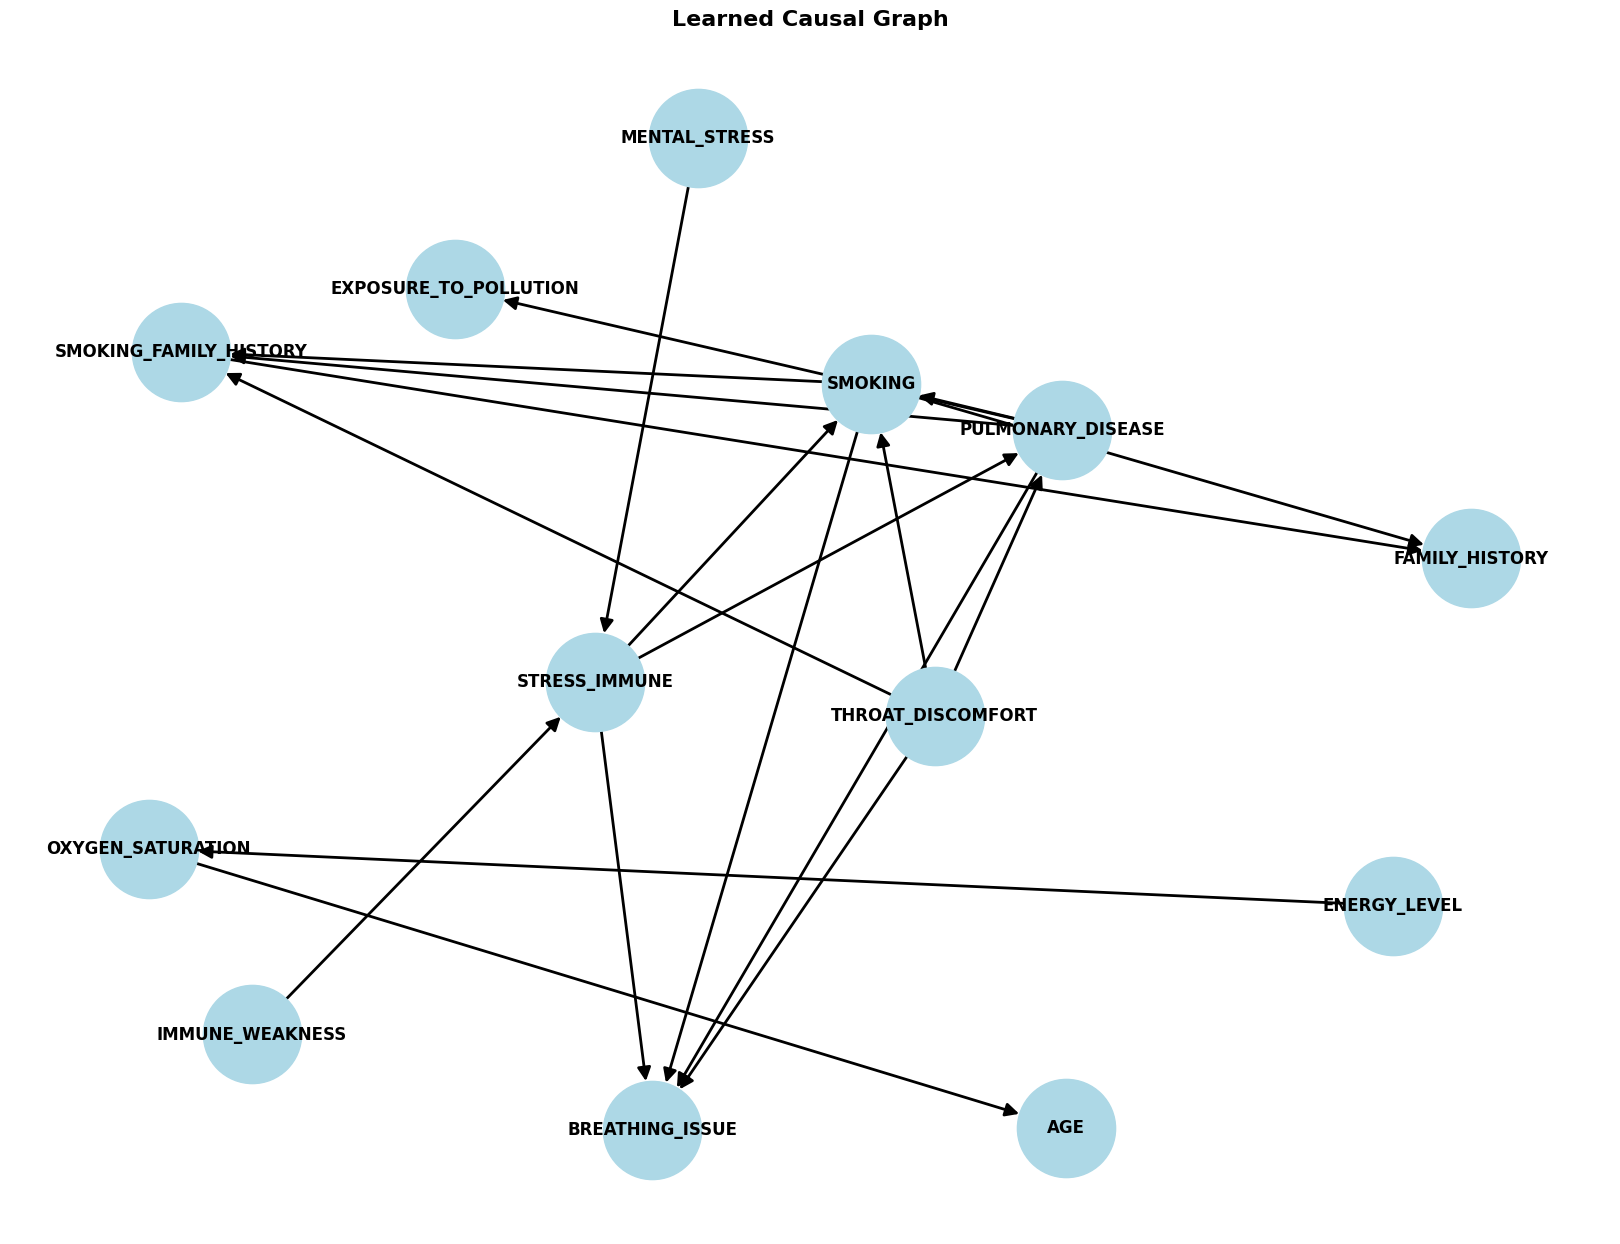

In [102]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch
from pgmpy.models.BayesianNetwork import BayesianNetwork

import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import BDeu



# Load Data
data = data_cleaned  # Replace with actual dataset

# Select relevant features
features = [
    "AGE", "GENDER", "SMOKING", "FINGER_DISCOLORATION", "MENTAL_STRESS",
    "EXPOSURE_TO_POLLUTION", "LONG_TERM_ILLNESS", "ENERGY_LEVEL",
    "IMMUNE_WEAKNESS", "BREATHING_ISSUE", "ALCOHOL_CONSUMPTION",
    "THROAT_DISCOMFORT", "OXYGEN_SATURATION", "CHEST_TIGHTNESS",
    "FAMILY_HISTORY", "SMOKING_FAMILY_HISTORY", "STRESS_IMMUNE",
    "PULMONARY_DISEASE"
]

data = data[features]  # Filter required features

# Learn Causal Structure using Hill Climbing

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BDeu(data),max_iter=20)


# Convert to NetworkX graph
G = nx.DiGraph(best_model.edges())

# Plot Graph
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black",
        node_size=5000, font_size=12, font_weight="bold", arrowsize=20, width=2)
plt.title("Learned Causal Graph", fontsize=16, fontweight="bold")
plt.show()


In [104]:
import pgmpy.estimators
print(dir(pgmpy.estimators))


['AIC', 'AICCondGauss', 'AICGauss', 'BDeu', 'BDs', 'BIC', 'BICCondGauss', 'BICGauss', 'BaseEstimator', 'BayesianEstimator', 'CITests', 'EM', 'ExhaustiveSearch', 'ExpectationMaximization', 'ExpertInLoop', 'ExpertKnowledge', 'GES', 'HillClimbSearch', 'IVEstimator', 'K2', 'LinearModel', 'LogLikelihoodCondGauss', 'LogLikelihoodGauss', 'MLE', 'MarginalEstimator', 'MaximumLikelihoodEstimator', 'MirrorDescentEstimator', 'MmhcEstimator', 'PC', 'ParameterEstimator', 'SEMEstimator', 'ScoreCache', 'StructureEstimator', 'StructureScore', 'TreeSearch', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'expert', 'get_scoring_method']


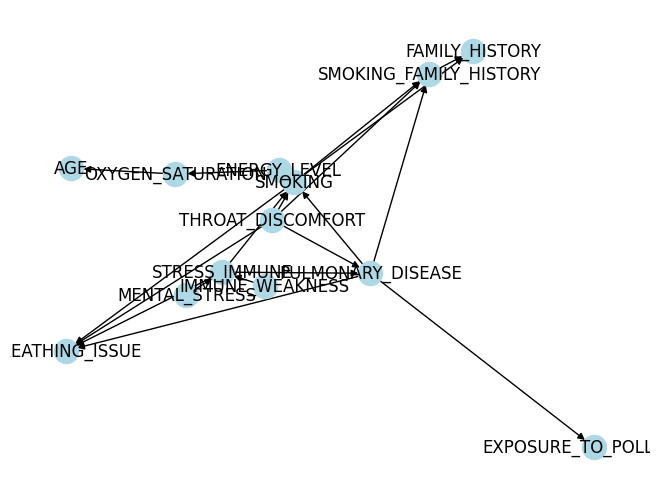

In [120]:
import networkx as nx
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="black")
plt.show()


In [123]:
from networkx.algorithms.cycles import find_cycle

try:
    cycle = find_cycle(best_model)
    print("Cycle detected:", cycle)
except:
    print("No cycles found, the graph is a valid DAG")


No cycles found, the graph is a valid DAG


In [124]:
from pgmpy.estimators import PC

pc_estimator = PC(data)
dag = pc_estimator.estimate()
dag.edges()  # Check learned causal structure



  0%|          | 0/5 [00:00<?, ?it/s]

OutEdgeView([('MENTAL_STRESS', 'STRESS_IMMUNE'), ('STRESS_IMMUNE', 'PULMONARY_DISEASE'), ('IMMUNE_WEAKNESS', 'STRESS_IMMUNE'), ('EXPOSURE_TO_POLLUTION', 'PULMONARY_DISEASE'), ('SMOKING', 'PULMONARY_DISEASE'), ('SMOKING', 'SMOKING_FAMILY_HISTORY'), ('BREATHING_ISSUE', 'PULMONARY_DISEASE'), ('SMOKING_FAMILY_HISTORY', 'PULMONARY_DISEASE'), ('THROAT_DISCOMFORT', 'PULMONARY_DISEASE'), ('FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY')])

In [125]:
from pgmpy.models import DiscreteBayesianNetwork

# Convert your DAG to a Bayesian Network
bayesian_model = DiscreteBayesianNetwork(best_model.edges())

# Now, apply MLE
from pgmpy.estimators import MaximumLikelihoodEstimator

mle_estimator = MaximumLikelihoodEstimator(bayesian_model, data)

# for node in bayesian_model.nodes():
  #  print(mle_estimator.estimate_cpd(node))




In [126]:
from pgmpy.inference import VariableElimination

# Attach CPDs to the model
bayesian_model.fit(data, estimator=MaximumLikelihoodEstimator)

# Verify CPDs
# for cpd in bayesian_model.get_cpds():
 #   print(cpd)

In [127]:
inference = VariableElimination(bayesian_model)

# Example Query: P(Pulmonary_Disease | Smoking = 1)
result = inference.query(variables=['PULMONARY_DISEASE'], evidence={'SMOKING': 1})
print(result)


+----------------------+--------------------------+
| PULMONARY_DISEASE    |   phi(PULMONARY_DISEASE) |
+======================+==========================+
| PULMONARY_DISEASE(0) |                   0.4313 |
+----------------------+--------------------------+
| PULMONARY_DISEASE(1) |                   0.5687 |
+----------------------+--------------------------+


!pip install dowhy

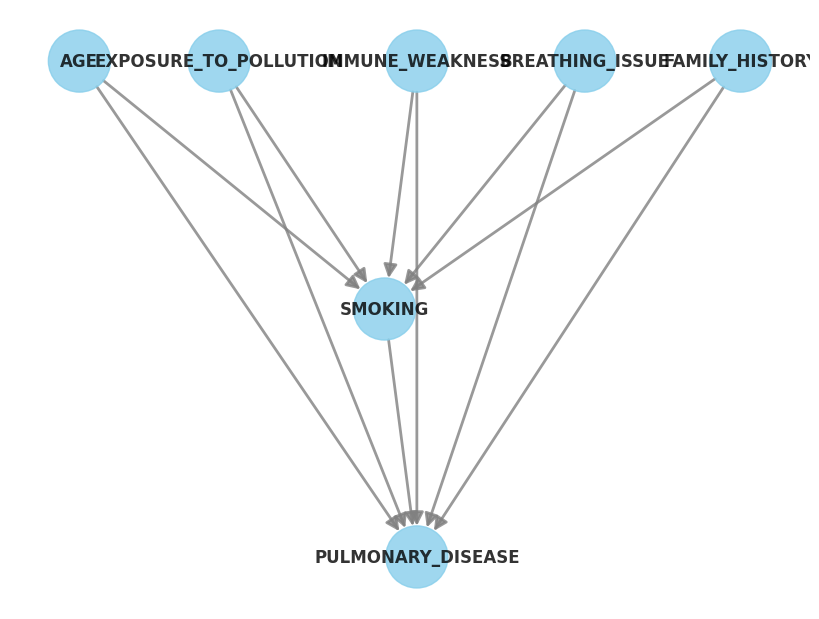

In [128]:
  # Install DoWhy if not already installed
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt

model = CausalModel(
    data=data,  # Your dataset
    treatment="SMOKING",  # The cause (X)
    outcome="PULMONARY_DISEASE",  # The effect (Y)
    common_causes=["AGE","EXPOSURE_TO_POLLUTION","IMMUNE_WEAKNESS", "BREATHING_ISSUE","FAMILY_HISTORY"]  # Confounders
)

model.view_model(layout="dot")  # Correct method to visualize causal graph
plt.show()

In [129]:
identified_estimand = model.identify_effect()
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                                              ↪
──────────(E[PULMONARY_DISEASE|BREATHING_ISSUE,FAMILY_HISTORY,EXPOSURE_TO_POLLUTION,IMMUNE_WEAKNES ↪
d[SMOKING]                                                                                         ↪

↪        
↪ S,AGE])
↪        
Estimand assumption 1, Unconfoundedness: If U→{SMOKING} and U→PULMONARY_DISEASE then P(PULMONARY_DISEASE|SMOKING,BREATHING_ISSUE,FAMILY_HISTORY,EXPOSURE_TO_POLLUTION,IMMUNE_WEAKNESS,AGE,U) = P(PULMONARY_DISEASE|SMOKING,BREATHING_ISSUE,FAMILY_HISTORY,EXPOSURE_TO_POLLUTION,IMMUNE_WEAKNESS,AGE)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [134]:
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")
print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                                              ↪
──────────(E[PULMONARY_DISEASE|BREATHING_ISSUE,FAMILY_HISTORY,EXPOSURE_TO_POLLUTION,IMMUNE_WEAKNES ↪
d[SMOKING]                                                                                         ↪

↪        
↪ S,AGE])
↪        
Estimand assumption 1, Unconfoundedness: If U→{SMOKING} and U→PULMONARY_DISEASE then P(PULMONARY_DISEASE|SMOKING,BREATHING_ISSUE,FAMILY_HISTORY,EXPOSURE_TO_POLLUTION,IMMUNE_WEAKNESS,AGE,U) = P(PULMONARY_DISEASE|SMOKING,BREATHING_ISSUE,FAMILY_HISTORY,EXPOSURE_TO_POLLUTION,IMMUNE_WEAKNESS,AGE)

## Realized estimand
b: PULMONARY_DISEASE~SMOKING+BREATHING_ISSUE+FAMILY_HISTORY+EXPOSURE_TO_POLLUTION+IMMUNE_WEAKNESS+AGE
Target units: ate

## Estimate
Mean value: 0.4816



In [139]:
# Generate counterfactual data
counterfactuals = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter",num_simulations=100)
print(counterfactuals)

Refute: Use a Placebo Treatment
Estimated effect:0.4816
New effect:-0.0015100000000000005
p value:0.98



In [140]:
print(counterfactuals.__dict__)  # Print all attributes of the object


{'estimated_effect': 0.4816, 'new_effect': -0.0015100000000000005, 'refutation_type': 'Refute: Use a Placebo Treatment', 'refutation_result': {'p_value': 0.98, 'is_statistically_significant': False}, 'refuter': <dowhy.causal_refuters.placebo_treatment_refuter.PlaceboTreatmentRefuter object at 0x7bb7f06c9ed0>}


In [136]:
sensitivity_analysis = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(sensitivity_analysis)


Refute: Add a random common cause
Estimated effect:0.4816
New effect:0.4816
p value:1.0

